In [105]:
import sisl   
import sisl.io.siesta as ss
import numpy as np   
import matplotlib.pyplot as plt
import sisl.viz
from scipy.io import FortranFile

from sisl import *
from sisl.io import *
# from sisl.viz import merge_plots

from scipy import linalg

%matplotlib inline

In [124]:
geom = sisl.get_sile("/fs2/home/ndsim10/all-kinds-test/graphene-defect-transport/Pristine-armchair-168/dft/same_kgrid/RUN.fdf").read_geometry()
hsx = hsxSileSiesta("/fs2/home/ndsim10/all-kinds-test/graphene-defect-transport/Pristine-armchair-168/dft/same_kgrid/siesta.HSX")
H = hsx.read_hamiltonian(geometry=geom)
S = hsx.read_overlap(geometry=geom)

warn:0: MissingFermiLevelWarning: /fs2/home/ndsim10/all-kinds-test/graphene-defect-transport/Pristine-armchair-168/dft/same_kgrid/siesta.HSX does not contain Ef, electronic structure not shifted to Fermi level.


In [125]:
print(H.shape)
H[0,0]

(1512, 13608, 2)


array([-18.99531,   1.     ], dtype=float32)

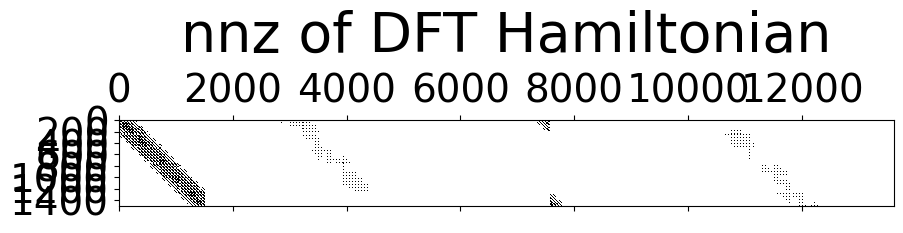

In [126]:
# Hk = H.Hk(k=(0,0,0)).toarray()
Hk = H.tocsr().toarray()
plt.figure(figsize=(10,20))
plt.title("nnz of DFT Hamiltonian", fontsize=40, pad=15)
# 设置xy轴刻度数字的大小
plt.tick_params(axis='x', labelsize=28)
plt.tick_params(axis='y', labelsize=28)
plt.spy(Hk)
# plt.savefig("save_pic/nnz_of_DFT_Hamiltonian.svg", 
#             format='svg', dpi=300, bbox_inches='tight',  transparent=False)#pil_kwargs={"compression": "none"},

In [127]:
geom1 = sisl.get_sile("/fs2/home/ndsim10/all-kinds-test/graphene-defect-transport/Pristine-armchair-168/0.0V/RUN.fdf").read_geometry()
hsx1 = tshsSileSiesta("/fs2/home/ndsim10/all-kinds-test/graphene-defect-transport/Pristine-armchair-168/0.0V/siesta.TSHS")
H1 = hsx1.read_hamiltonian(geometry=geom1)
S1 = hsx1.read_overlap(geometry=geom1)

In [128]:
print(H1.shape)
H1[0,0]

(1512, 13608, 2)


array([-13.514583  ,   0.99999998])

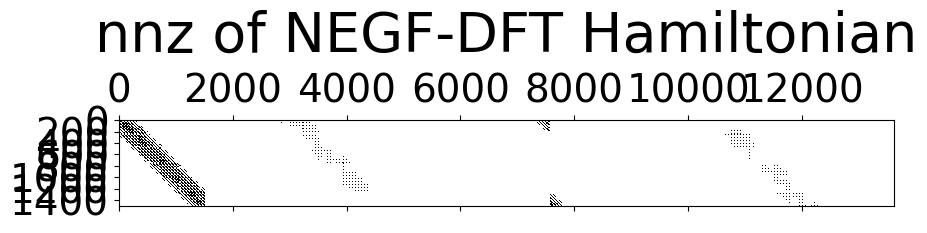

In [129]:
# Hk1 = H1.Hk(k=(0,0,0)).toarray()
Hk1 = H1.tocsr().toarray()
plt.figure(figsize=(10,10))
plt.title("nnz of NEGF-DFT Hamiltonian", fontsize=40, pad=15)
# 设置xy轴刻度数字的大小
plt.tick_params(axis='x', labelsize=28)
plt.tick_params(axis='y', labelsize=28)
plt.spy(Hk1)
# plt.savefig("save_pic/nnz_of_NEGF_DFT_Hamiltonian.svg", 
#             format='svg', dpi=300, bbox_inches='tight', transparent=False)

In [112]:
Hk.shape

(1512, 1512)

In [113]:
Hk1.shape

(1512, 1512)

-5.483900927423992
2.487786726228716


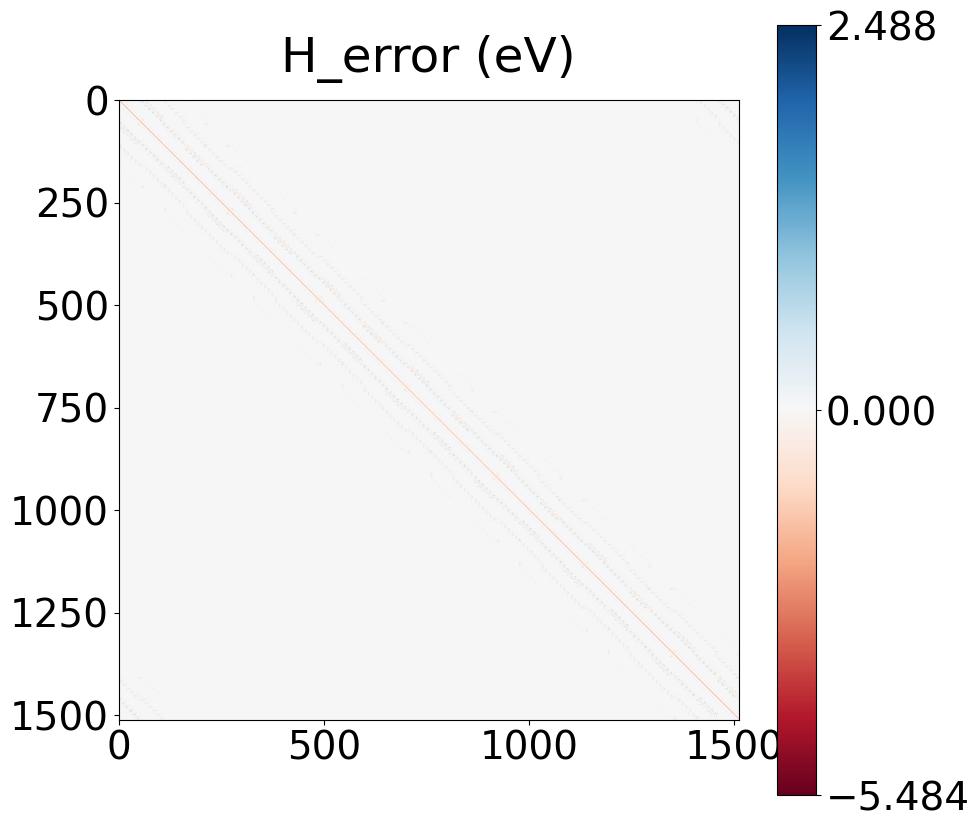

In [120]:
from matplotlib.colors import TwoSlopeNorm
plt.figure(figsize=(10,10))

Hk_error = Hk.real - Hk1.real
min_value = np.min(Hk_error)
max_value = np.max(Hk_error)
print(min_value)
print(max_value)
cmap = plt.colormaps.get_cmap('RdBu')

norm = TwoSlopeNorm(vmin=min_value, vcenter=0, vmax=max_value)
# 绘制图像
im = plt.imshow(Hk_error, cmap=cmap, norm=norm)

# 添加颜色条并设置刻度显示 min / 0 / max
cbar = plt.colorbar(im)
cbar.set_ticks([min_value, 0, max_value])
# cbar.set_ticklabels([f"{min_value:.3f}", "-0.005", "0.000", "0.010", f"{max_value:.3f}"])
# cbar.set_label('(eV)', fontsize=28, loc='center', labelpad=20) 
cbar.ax.tick_params(labelsize=28)

plt.title("H_error (eV)", fontsize=35, pad=20)
plt.tick_params(axis='x', labelsize=28)
plt.tick_params(axis='y', labelsize=28)

plt.savefig("save_pic/H_error.svg", 
            format='svg', dpi=300, bbox_inches='tight', transparent=False) #
plt.show()

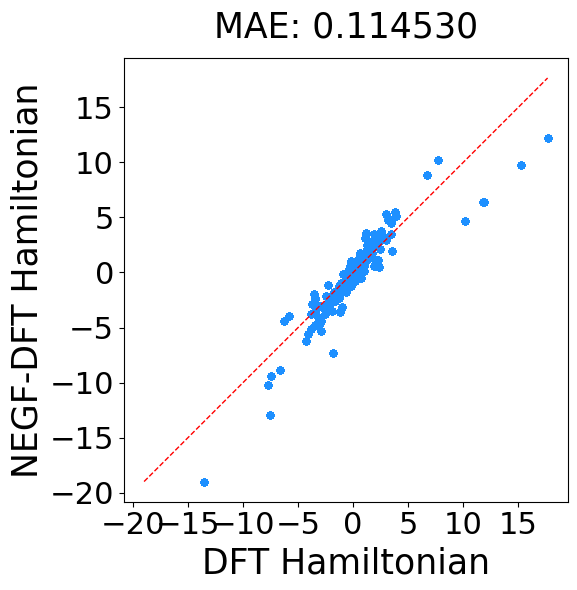

In [104]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

dft_H = []
negfdft_H = []

for i, j in H.iter_nnz(atoms=None, orbitals=None):
    dft_H.append(H.H[i, j])
    negfdft_H.append(H1.H[i, j])

# 假设你已经有两个数组：真实值 y_true 和预测值 y_pred
# 示例数据（实际使用时用你自己的数据替代）
y_true = np.array(dft_H)
y_pred = np.array(negfdft_H)  # 单词自洽后误差几乎为0

# 计算 MAE
mae = mean_absolute_error(y_true, y_pred)

# 绘图
plt.figure(figsize=(6,6))
plt.scatter(y_pred, y_true, s=20, color='dodgerblue', alpha=1.0)

# 绘制 y=x 的红色虚线
x_vals = np.linspace(min(y_pred.min(), y_true.min()), max(y_pred.max(), y_true.max()), 100)
plt.plot(x_vals, x_vals, 'r--', linewidth=1)

# 添加文本：MAE
# plt.text(-18, 10, f"MAE: {mae:.4f}", fontsize=22)

# 坐标轴标签
plt.xlabel("DFT Hamiltonian", fontsize=25)
plt.ylabel("NEGF-DFT Hamiltonian", fontsize=25)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
# 设置坐标轴范围和比例一致
# plt.xlim(-50, 20)
# plt.ylim(-50, 20)
# plt.xticks([-0.6, -0.3, 0.0, 0.3, 0.6])
plt.gca().set_aspect('equal', adjustable='box')
plt.title(f"MAE: {mae:.6f}", fontsize=25, pad=15)
# plt.title(r'$Graphene$-284', fontsize=22)
plt.tight_layout()
plt.savefig("save_pic/H_comparison.png", 
            format='png', dpi=600, bbox_inches='tight', transparent=True)
plt.show()

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import accumulate
import re
from sisl import *
from sisl.io import *
import sisl.viz
# from sisl.viz import merge_plots
from time import time
from scipy import linalg
import os
import h5py
import random
%matplotlib inline

In [35]:
input_path = '/fs2/home/ndsim10/DeepH-final/graphene_example/work_dir/olp/graphene_284_defect/'
# 初始化变量
E_F = None
k_min = None
k_max = None
total_bands = None
bands_data = []
current_band = []

ev2Hartree = 0.036749324533634074
Bohr2Ang = 0.529177249

# 打开deeph预测的siesta.dat文件并逐行读取
with open(input_path + 'bands.dat', 'r') as file:
    for line in file:
        # 去除行尾的换行符
        line = line.strip()
        # 检查是否是参数行
        if line.startswith('# E_F'):
            E_F = float(line.split('=')[1])
        elif line.startswith('# k_min, k_max'):
            k_values = re.findall(r"[-+]?\d*\.\d+|\d+", line)
            k_min, k_max = map(float, k_values)
        elif re.match(r"^\d", line):
            current_band.append(list(map(float, line.split())))
        # 如果遇到空行且当前组数据不为空，则开始新的数据组
        elif line == '' and current_band:
            bands_data.append(np.array(current_band))
            current_band = []

# 如果最后一组数据非空，也添加到bands_data中
if current_band:
    bands_data.append(np.array(current_band))

# 打印提取的参数
print(f"E_F = {E_F}")
print(f"k_min = {k_min}")
print(f"k_max = {k_max}")

elements = []
with open(input_path + 'input.fdf', 'r') as file:
    within_block = None
    for line in file:
        # 检查是否到达区块开始
        if '%block Band' in line:
            within_block = True
            continue  # 跳过当前行，不做处理
        # 检查是否到达区块结束
        elif '%endblock Band' in line:
            within_block = False
            break  # 区块结束，退出循环
        # 处理区块内的内容
        if within_block:
            element = line.split()  # 拆分行内容为列表
            if element:  # 确保行非空
                elements.append(element)
xticks_list = [str(element[-1]) for element in elements]
xticks_v_list = [int(element[0]) for element in elements]
cumulative_sums = list(accumulate(xticks_v_list))
new_xticks = [item - 1 for item in cumulative_sums]
print(xticks_list)
print(new_xticks)
dos_data1 = np.loadtxt(input_path + 'dos.dat')
E_points = dos_data1[:,0]
#费米能级：SVED:-3.835； SV59:-3.8947;  SV55-66:-3.835;  SW:-3.6111
DOS1 = dos_data1[:,3]
for i in range(len(bands_data)):
    k_points = bands_data[i][:,0] / Bohr2Ang  # k点数据

E_F = -5.7062
k_min = 0.0
k_max = 0.1776
['Γ', 'M', 'K', 'Γ']
[0, 15, 25, 40]


In [36]:
len(bands_data)

2556

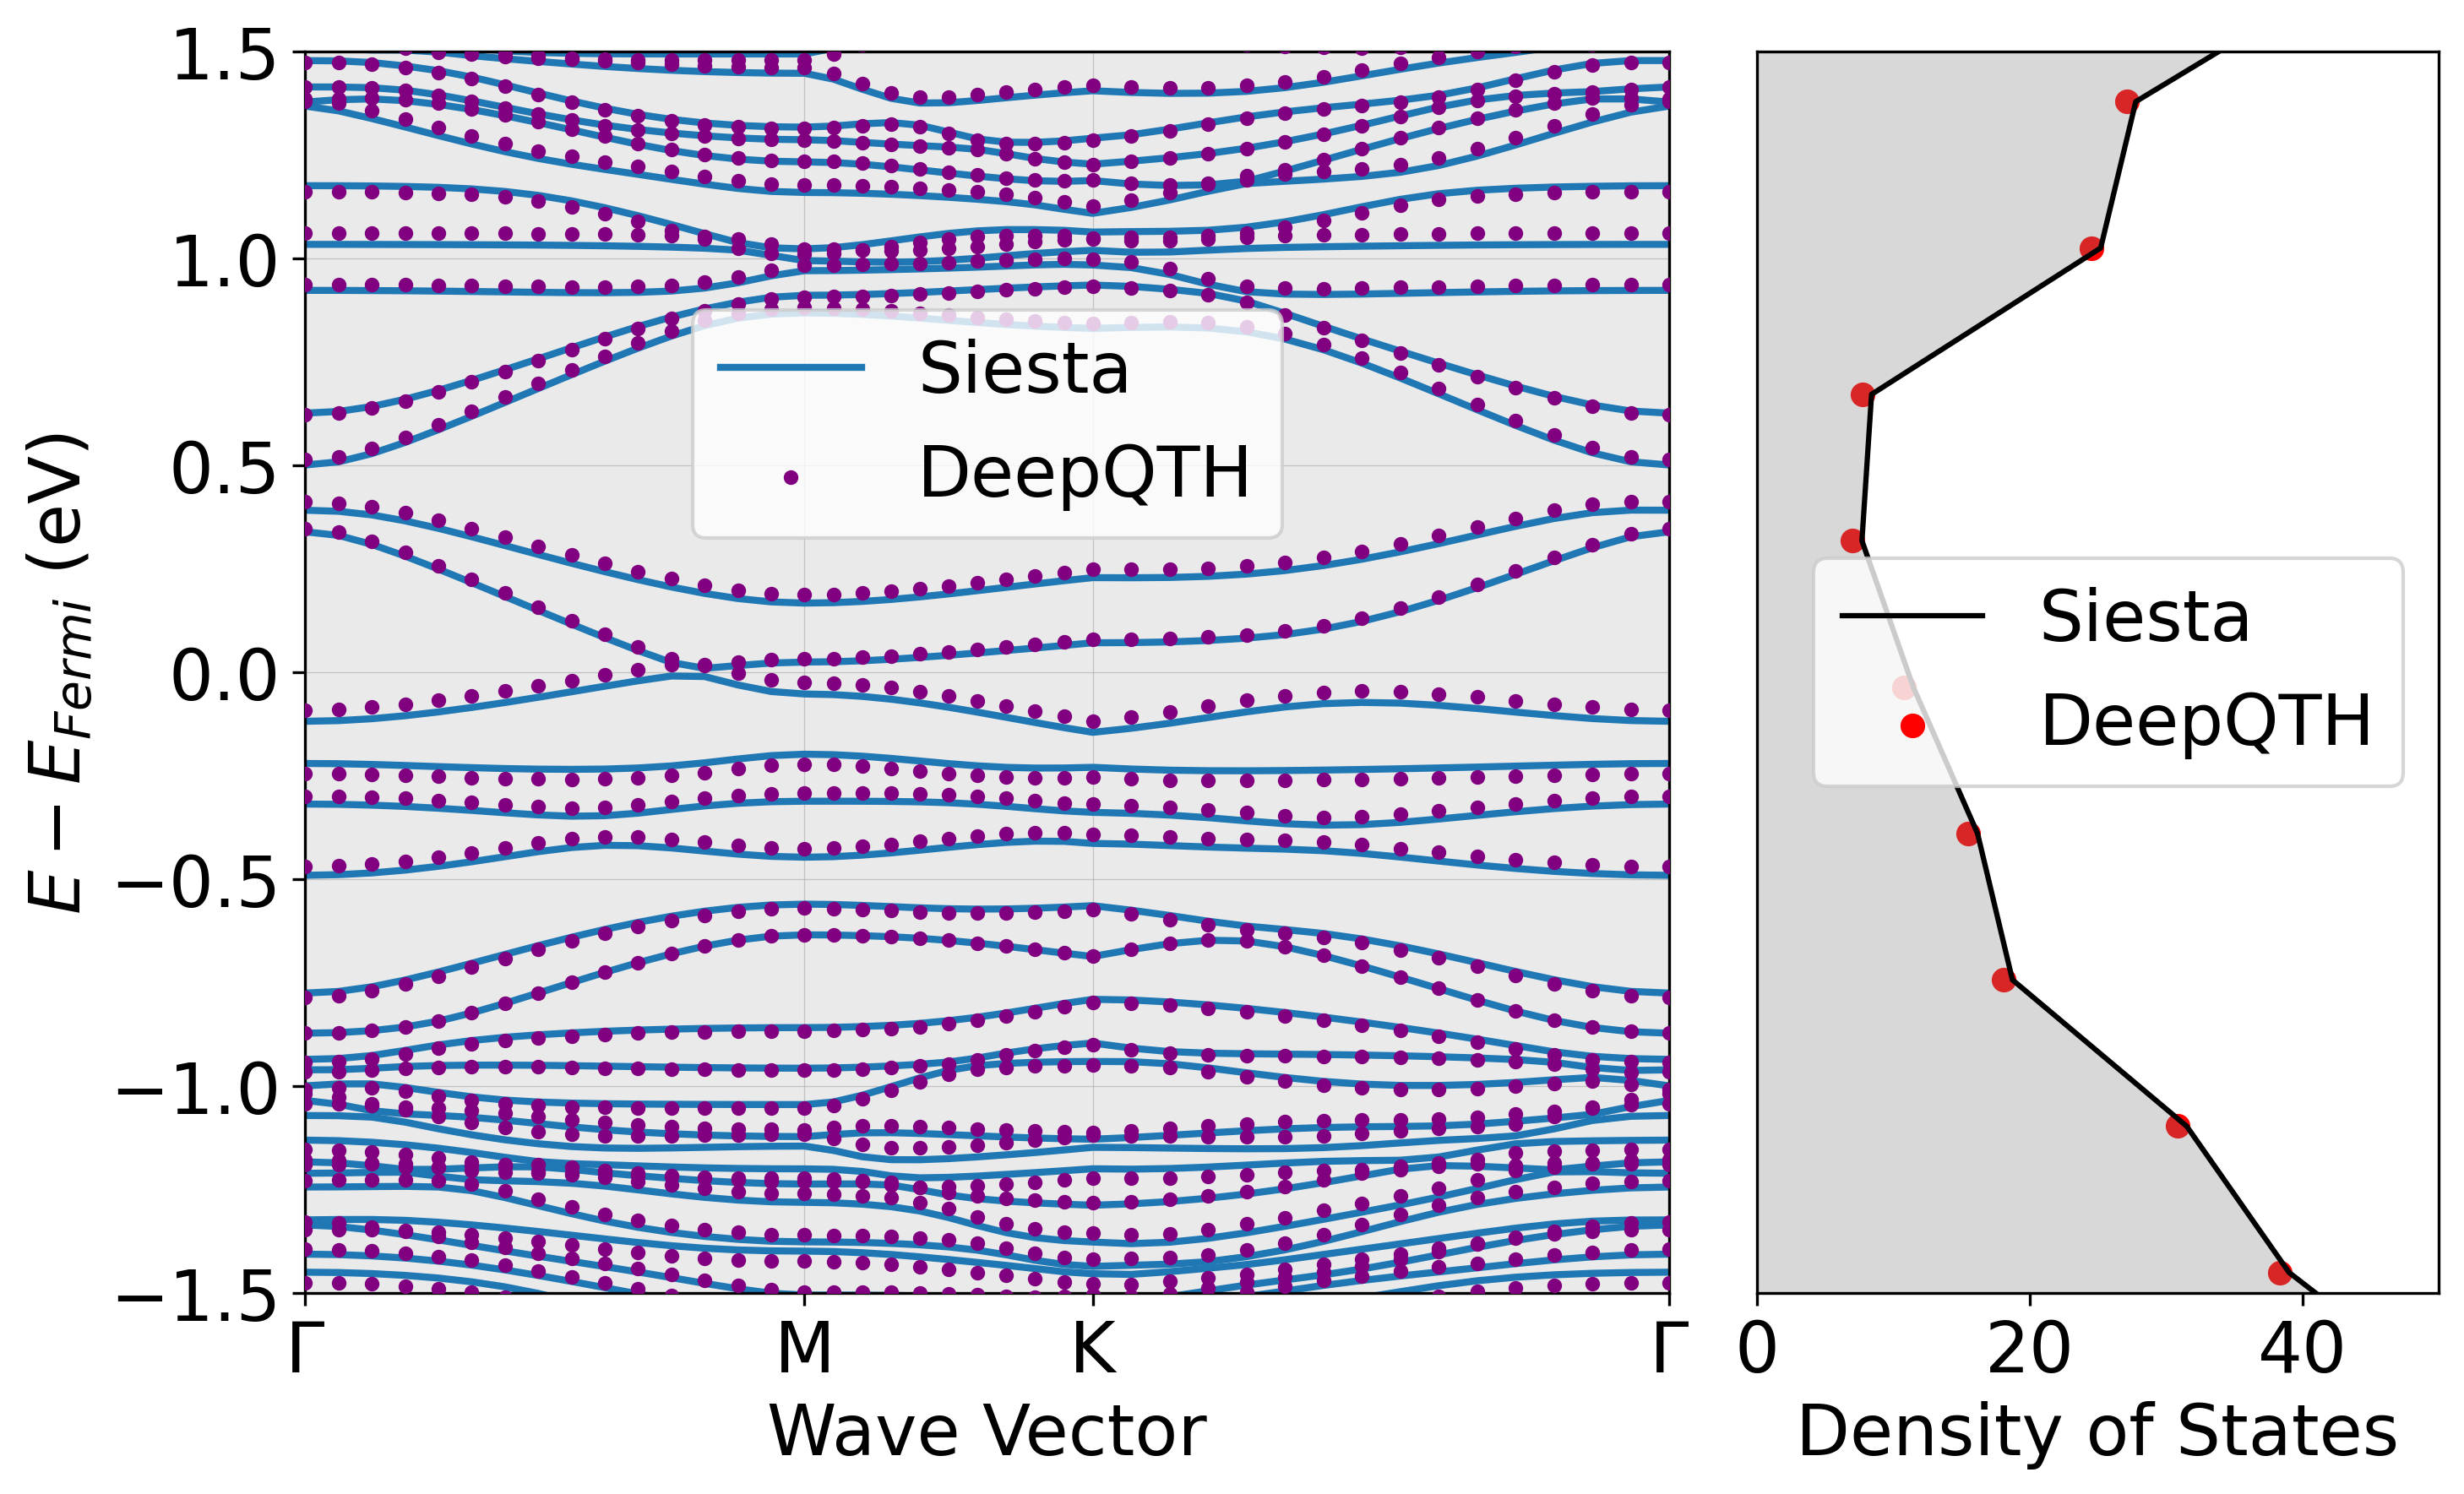

In [39]:
import matplotlib.pyplot as plt
import numpy as np

import random

random.seed(42)
np.random.seed(42)

# 示例数据
wave_vectors = bands_data[0][:,0] / Bohr2Ang # 波矢
energy_bands = [bands_data[i][:,1] - E_F for i in range(len(bands_data))]  # 模拟多个能带
density_of_states_total = DOS1  # 总态密度
energy_dos = E_points - E_F # 态密度的能量轴 

# 创建图形
fig, axs = plt.subplots(1, 2, figsize=(10, 6), dpi=300, gridspec_kw={'width_ratios': [2, 1]})

# 绘制能带图
i = 0
for band in energy_bands:
    if i == 0:
        axs[0].plot(wave_vectors, band, color='#1f77b4', linewidth=2.0, label='Siesta')
        axs[0].scatter(wave_vectors, band+random.uniform(-0.03, 0.03), color='purple', s=10, zorder=5, label='DeepQTH')  # 示例点
    else:
        axs[0].plot(wave_vectors, band, color='#1f77b4', linewidth=2.0)
        axs[0].scatter(wave_vectors, band+random.uniform(-0.03, 0.03), color='purple', s=10, zorder=5)  # 示例点
    i = i + 1
axs[0].set_facecolor("#eaeaea")
axs[0].set_xlabel("Wave Vector", fontsize=20)
axs[0].set_ylabel(r"$E - E_{Fermi}$ (eV)", fontsize=20)
axs[0].set_xticks([wave_vectors[new_xtick] for new_xtick in new_xticks])
axs[0].set_xticklabels(xticks_list)
axs[0].grid(True, linewidth=0.3, alpha=0.7)
axs[0].set_ylim(-1.5, 1.5)
axs[0].set_xlim(wave_vectors[0], wave_vectors[-1])
axs[0].legend(loc='center', bbox_to_anchor=(0.5, 0.7), fontsize=20)
# axs[0].grid(color='white', linestyle='-', linewidth=0.5, alpha=0.7)

# 绘制态密度图
axs[1].plot(density_of_states_total, energy_dos, color='black', label="Siesta")
axs[1].scatter(density_of_states_total+random.uniform(-1.0, 1.0), energy_dos, color='red', label="DeepQTH")
axs[1].fill_betweenx(energy_dos, 0, density_of_states_total, color='gray', alpha=0.3)
axs[1].set_xlabel("Density of States", fontsize=20)
axs[1].legend(loc='center right', fontsize=20)
axs[1].set_yticks([])  # 移除右侧子图的y轴刻度
axs[1].set_ylim(-1.5, 1.5)
axs[1].set_xlim(0, 50)

# 放大刻度字体
axs[0].tick_params(axis='both', labelsize=20)
axs[1].tick_params(axis='both', labelsize=20)

# 调整布局
plt.tight_layout()

# 保存为高清矢量图
plt.savefig(input_path + "band_dos_plot.png", format='png', dpi=500, bbox_inches='tight')

plt.show()

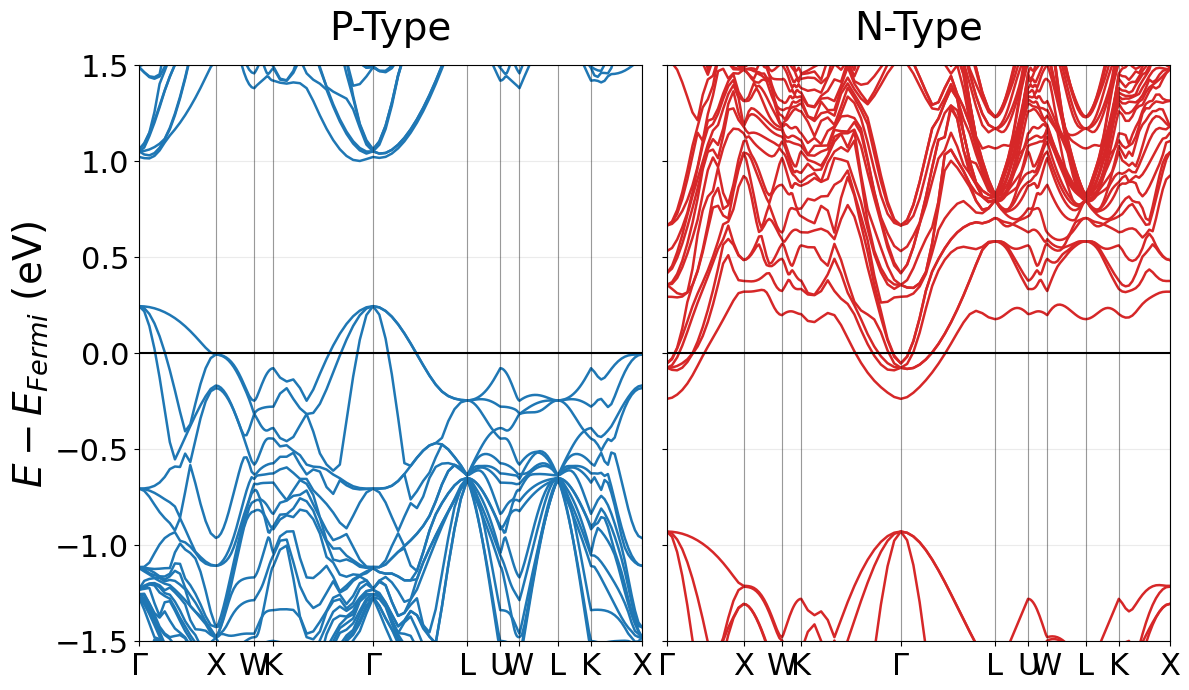

In [54]:
### 论文正文中读取左右电极的能带图

import re, numpy as np
import matplotlib.pyplot as plt
from itertools import accumulate

# ===== 路径 =====
left_electrode_path = '/fs2/home/ndsim10/all-kinds-test/si/si_pn_384/electrode-left/'
right_electrode_path = '/fs2/home/ndsim10/all-kinds-test/si/si_pn_384/electrode-right/'

Bohr2Ang = 0.529177249

def read_bands_and_ticks(path):
    E_F = None
    bands_data, current_band = [], []

    # 读 bands.dat
    with open(path + 'bands.dat', 'r') as f:
        for line in f:
            s = line.strip()
            if s.startswith('# E_F'):
                E_F = float(s.split('=')[1])
            elif re.match(r'^\d', s):
                current_band.append(list(map(float, s.split())))
            elif s == '' and current_band:
                bands_data.append(np.array(current_band))
                current_band = []
    if current_band:
        bands_data.append(np.array(current_band))

    # 读 k 路径标签
    xticks_list, xtick_counts = [], []
    with open(path + 'RUN.fdf', 'r') as f:
        inside = False
        for line in f:
            if '%block Band' in line: inside = True; continue
            if '%endblock Band' in line: break
            if inside:
                parts = line.split()
                if parts:
                    xtick_counts.append(int(parts[0]))   # 每段 k 点数量
                    xticks_list.append(parts[-1])        # 标签（Γ、X、L…）

    # 每段结束的索引（-1 对齐 Python 索引）
    cum = list(accumulate(xtick_counts))
    xtick_indices = [i - 1 for i in cum]

    # 用第一条带的 k 做 x 轴（各带一致）
    k_axis = bands_data[0][:, 0] / Bohr2Ang

    return bands_data, E_F, k_axis, xticks_list, xtick_indices


# ===== 读取左右电极 =====
L_bands, L_EF, kL, tick_labels, tick_idx = read_bands_and_ticks(left_electrode_path)
R_bands, R_EF, kR, _, _ = read_bands_and_ticks(right_electrode_path)

# 提醒：最好保证左右电极的 k 路径完全一致
if (len(kL) != len(kR)) or (np.max(np.abs(kL - kR)) > 1e-8):
    print("Warning: left/right k paths differ; using left path for ticks.")

# ===== 绘图：并排两个分图，共享 y 轴 =====
fig, axes = plt.subplots(1, 2, figsize=(12, 7), sharey=True)

# —— 左电极（蓝色）
ax = axes[0]
for i, bd in enumerate(L_bands):
    k = bd[:, 0] / Bohr2Ang
    e = bd[:, 1] - L_EF          # 以左电极费米能级为 0
    ax.plot(k, e, color='tab:blue', lw=1.8)

# 竖线与 0 eV 线
for idx in tick_idx:
    ax.axvline(kL[idx], color='k', lw=0.8, alpha=0.35)
ax.axhline(0.0, color='k', lw=1.5, alpha=1.0)

ax.set_xlim(kL[0], kL[-1])
ax.set_xticks([kL[i] for i in tick_idx])
ax.set_xticklabels(tick_labels, fontsize=22)
ax.set_title('P-Type', fontsize=28, y=1.03)
ax.set_ylabel(r"$E - E_{Fermi}$ (eV)", fontsize=28)
ax.grid(True, alpha=0.25)

# —— 右电极（红色）
ax = axes[1]
for bd in R_bands:
    k = bd[:, 0] / Bohr2Ang
    e = bd[:, 1] - R_EF          # 以右电极费米能级为 0
    ax.plot(k, e, color='tab:red', lw=1.8)

for idx in tick_idx:
    ax.axvline(kL[idx], color='k', lw=0.8, alpha=0.35)
ax.axhline(0.0, color='k', lw=1.5, alpha=1.0)

ax.set_xlim(kL[0], kL[-1])
ax.set_xticks([kL[i] for i in tick_idx])
ax.set_xticklabels(tick_labels, fontsize=22)
ax.set_title('N-Type', fontsize=28, y=1.03)
ax.grid(True, alpha=0.25)

# —— 统一 y 轴范围（可按需要调整）
for ax in axes:
    ax.set_ylim(-1.5, 1.5)       # 或者用数据自动范围：ax.set_ylim(None, None)
    ax.tick_params(axis='both', labelsize=22)   # ★ 调整刻度字体

# fig.suptitle('Band structures of electrodes (Fermi aligned)', fontsize=30, y=1.1)
fig.tight_layout()
fig.subplots_adjust(top=0.90, wspace=0.05)
fig.savefig('electrodes_bands_side_by_side.png', dpi=600, bbox_inches='tight')
plt.show()

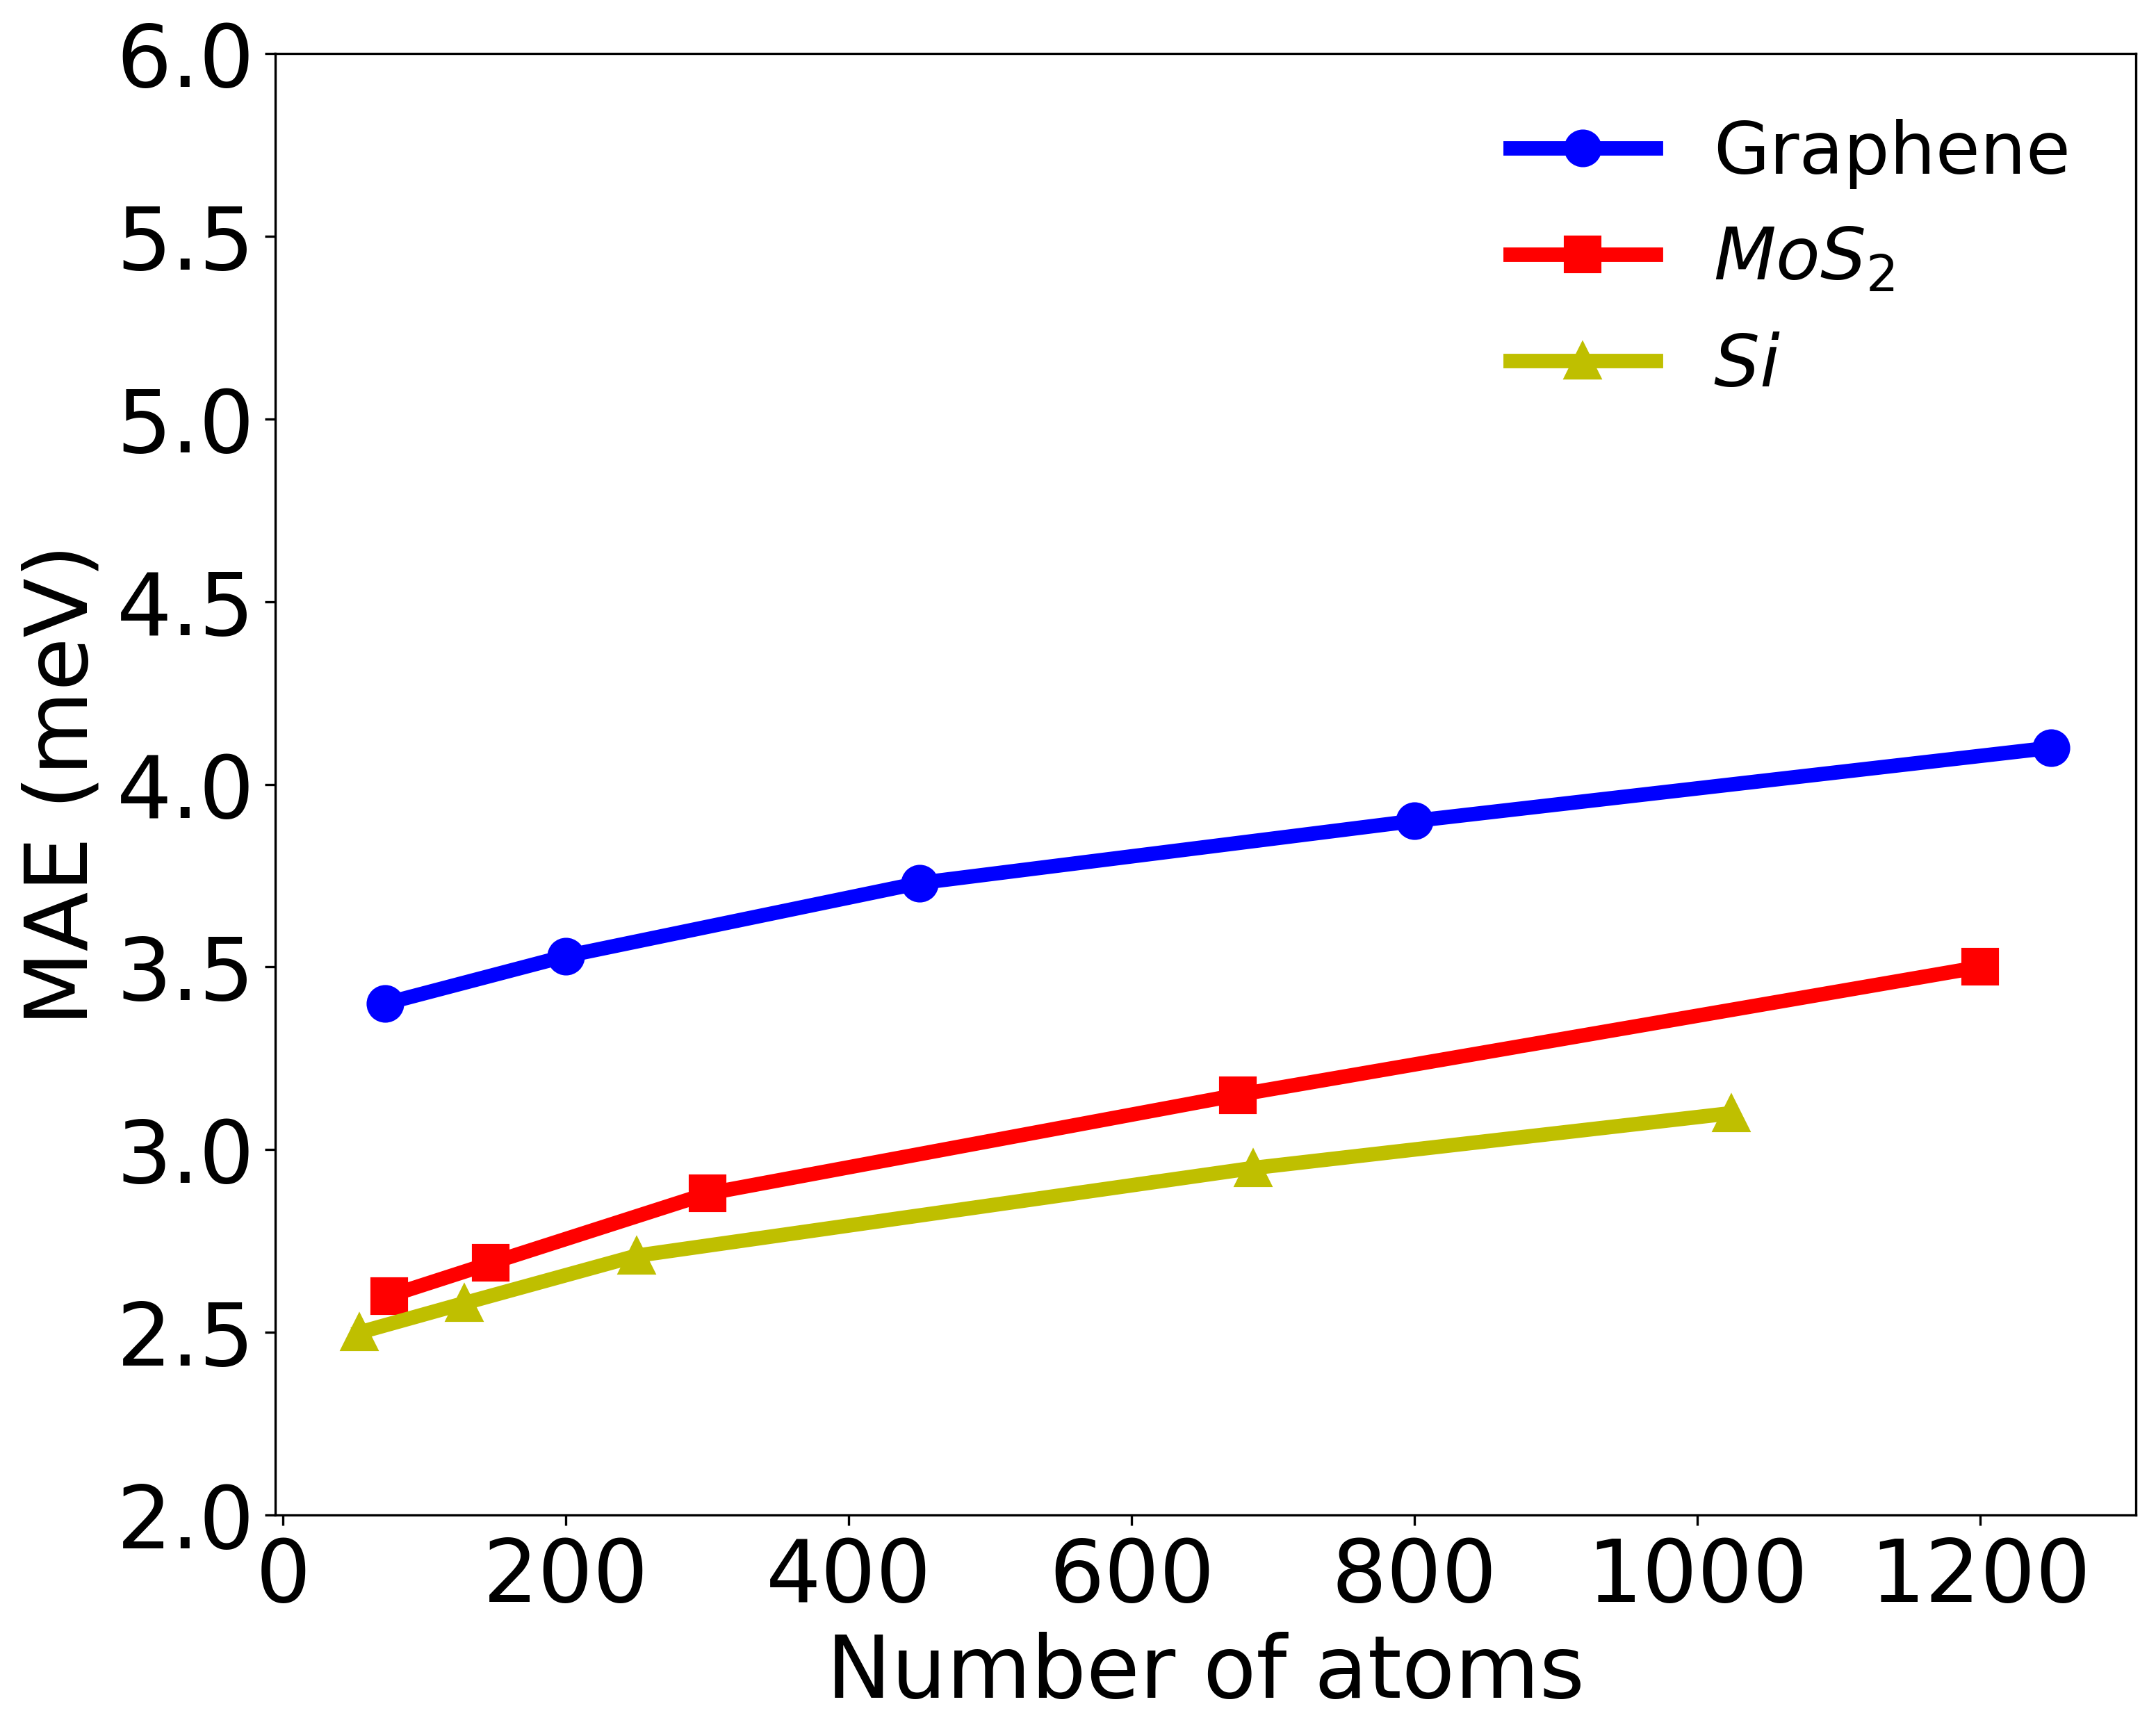

In [130]:
import matplotlib.pyplot as plt

# Sample data points
atoms1 = [72, 200, 450, 800, 1250]
mae1 = [3.40, 3.53, 3.73, 3.90, 4.10]
atoms2 = [75, 147, 300, 675, 1200]
mae2 = [2.6, 2.69, 2.88, 3.15, 3.50]
atoms3 = [54, 128, 250, 686, 1024]
mae3 = [2.5, 2.58, 2.71, 2.95, 3.10]


plt.figure(figsize=(10,8), dpi=300)
# Plotting

plt.plot(atoms1, mae1, 'b-o', markersize=12, label=r'Graphene', linewidth=5)
plt.plot(atoms2, mae2, 'r-s', markersize=12, label=r'$MoS_2$', linewidth=5)
plt.plot(atoms3, mae3, 'y-^', markersize=12, label=r'$Si$', linewidth=5)

# Adding labels and legend
plt.xlabel('Number of atoms', fontsize=30)
plt.ylabel('MAE (meV)', fontsize=30)
plt.legend(frameon=False, fontsize=25)
plt.tight_layout()
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.ylim(2.0,6.0)
# plt.grid()
plt.savefig("补充图6a.svg", format='svg', dpi=400, bbox_inches='tight')
plt.show()

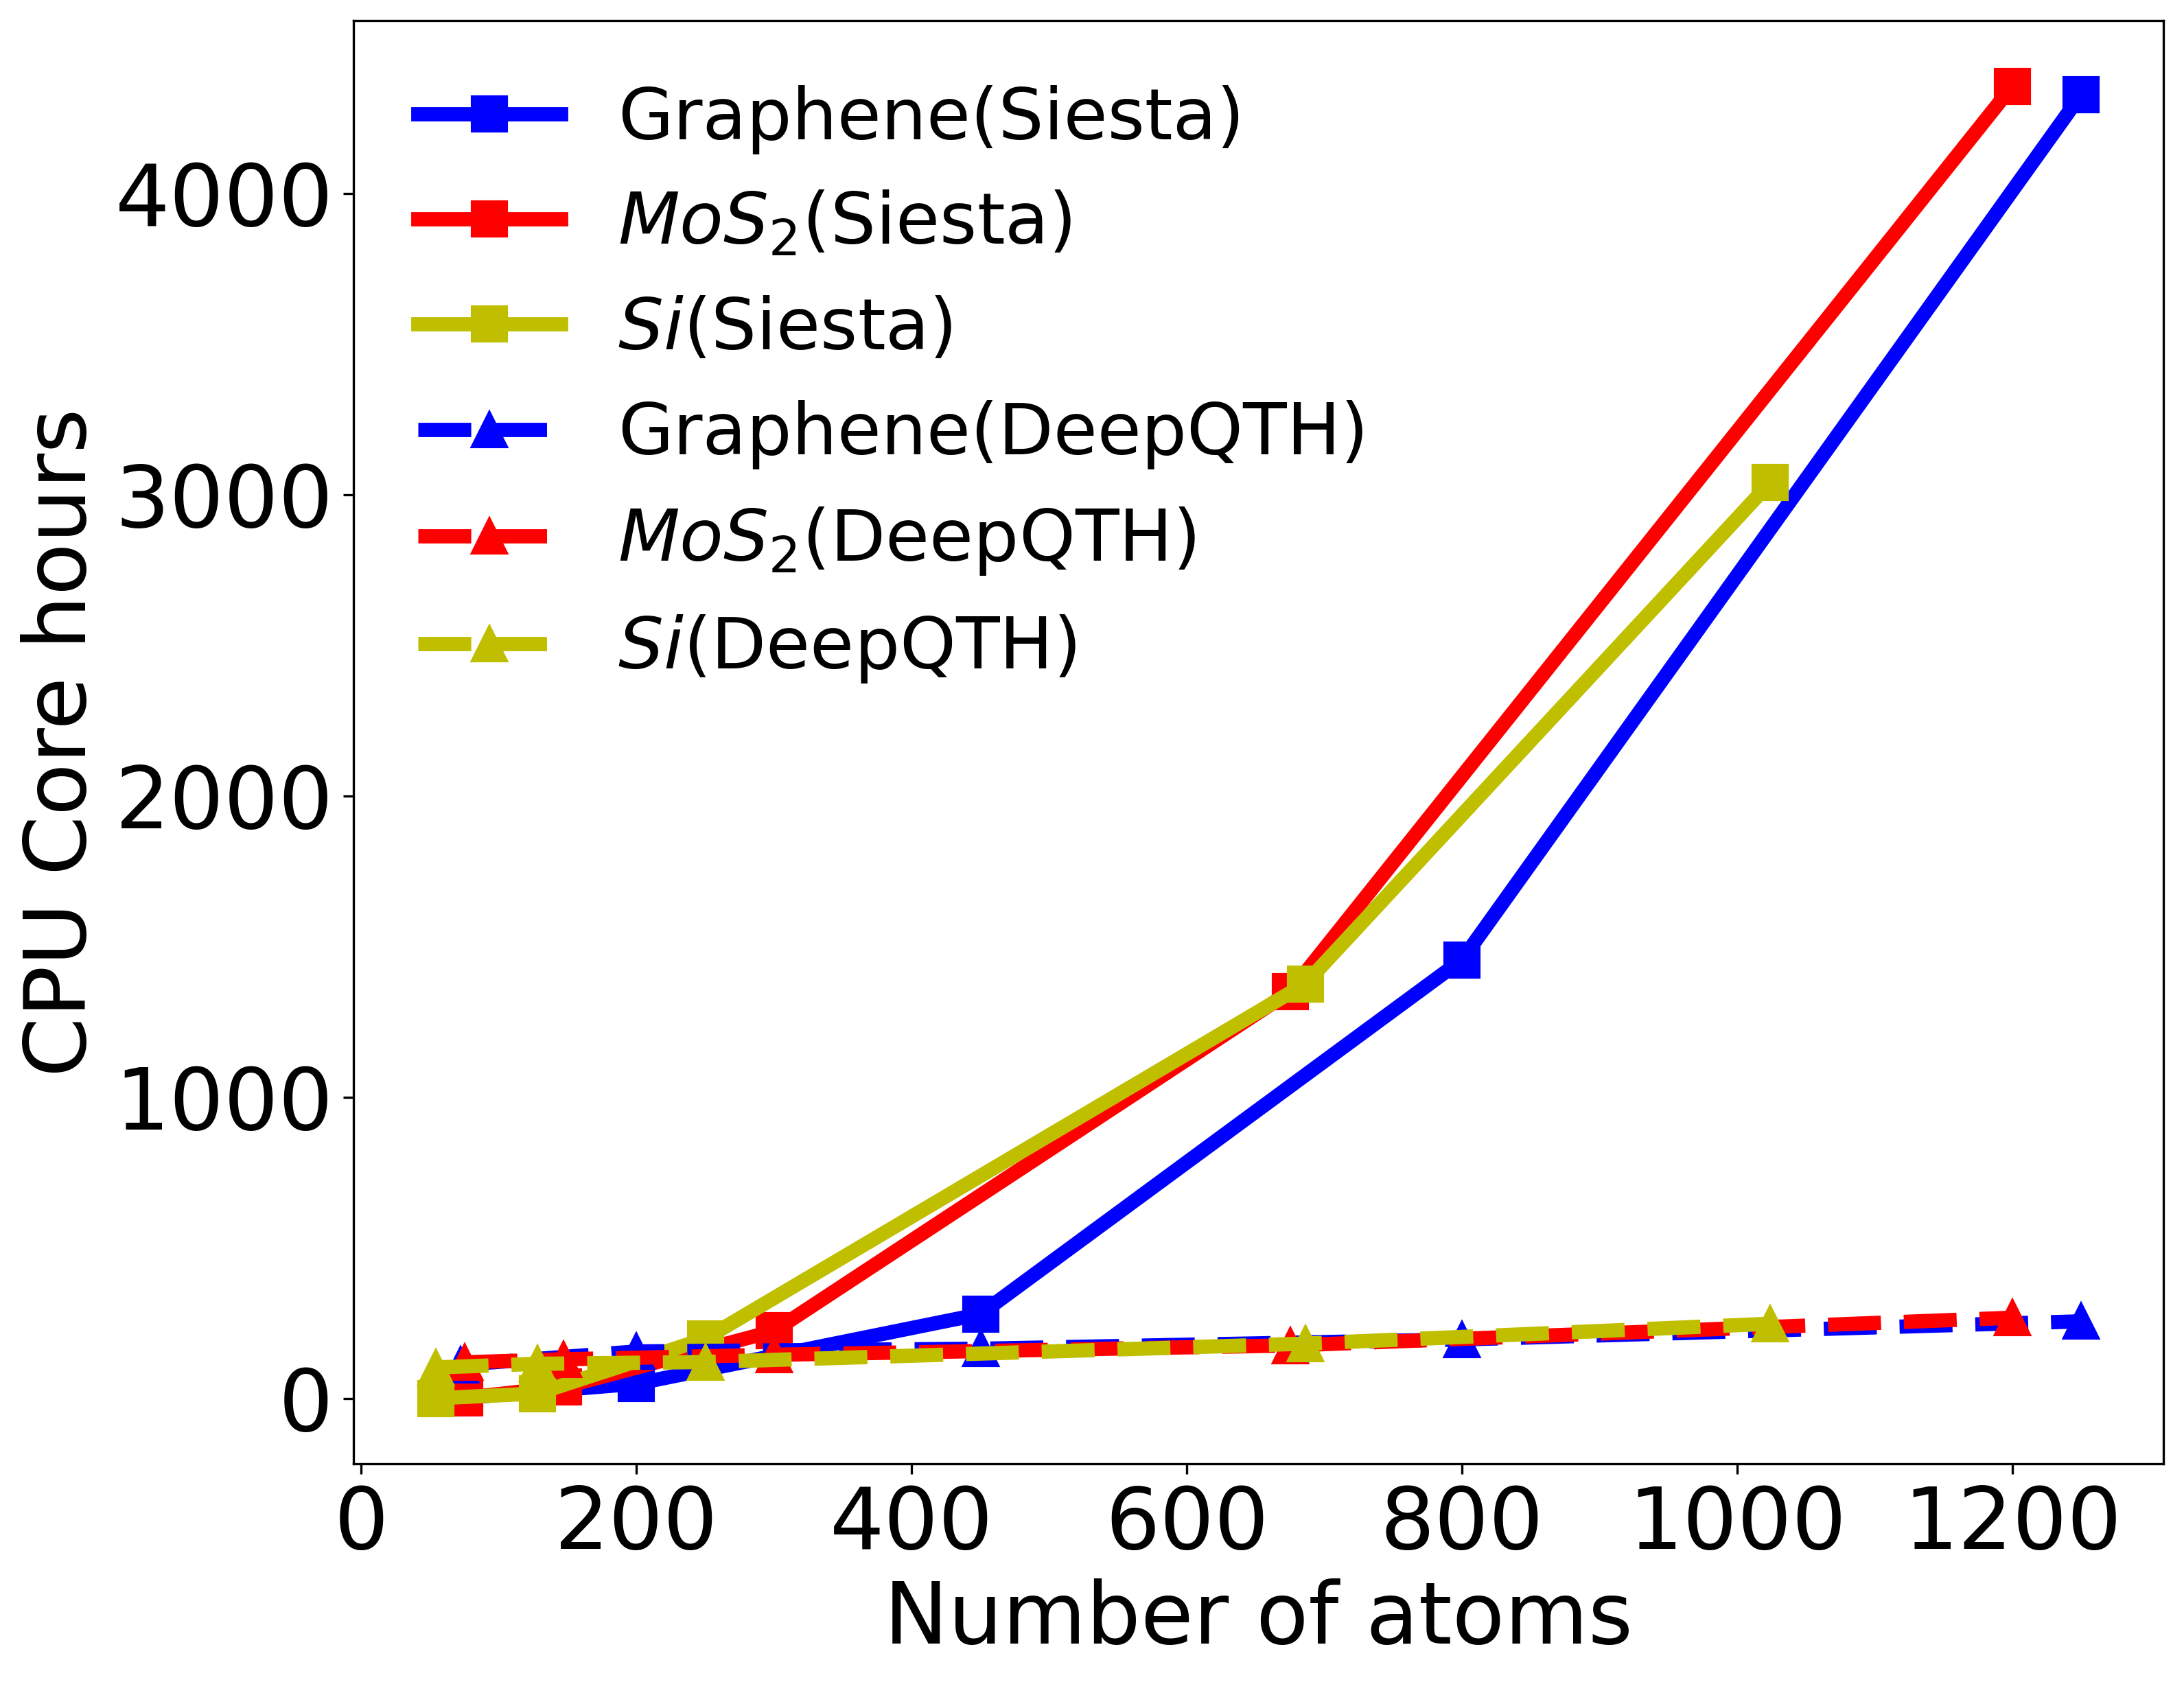

In [131]:
import matplotlib.pyplot as plt

# Sample data points
atoms1 = [72,  200, 450, 800,  1250]
ch1 =    [1.4, 49,  280, 1456, 4328]
atoms2 = [75,  147, 300, 675,  1200]
ch2 =    [2.2, 38,  224, 1350, 4356]
atoms3 = [54,  128, 250, 686,  1024]
ch3 =    [0.6, 16.5,198.5,1376,3040]

ch4 = [112, 156, 165, 196, 256]
ch5 = [120, 130, 145, 176, 268]
ch6 = [103, 115, 121, 182, 248]

plt.figure(figsize=(10,8), dpi=300)
# Plotting
plt.plot(atoms1, ch1, 'b-s', markersize=12, label=r'Graphene(Siesta)', linewidth=5)
plt.plot(atoms2, ch2, 'r-s', markersize=12, label=r'$MoS_2$(Siesta)', linewidth=5)
plt.plot(atoms3, ch3, 'y-s', markersize=12, label=r'$Si$(Siesta)', linewidth=5)


plt.plot(atoms1, ch4, 'b--^', markersize=12, label=r'Graphene(DeepQTH)', linewidth=5)
plt.plot(atoms2, ch5, 'r--^', markersize=12, label=r'$MoS_2$(DeepQTH)', linewidth=5)
plt.plot(atoms3, ch6, 'y--^', markersize=12, label=r'$Si$(DeepQTH)', linewidth=5)

# plt.rcParams['legend.fontsize'] = 10
# Adding labels and legend
plt.xlabel('Number of atoms', fontsize=30)
plt.ylabel('CPU Core hours', fontsize=30)
plt.legend(frameon=False, fontsize=25)
plt.tight_layout()
# plt.ylim(0.5,1.0)
# plt.grid()
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.savefig("补充图6b.svg", format='svg', dpi=400, bbox_inches='tight')
plt.show()

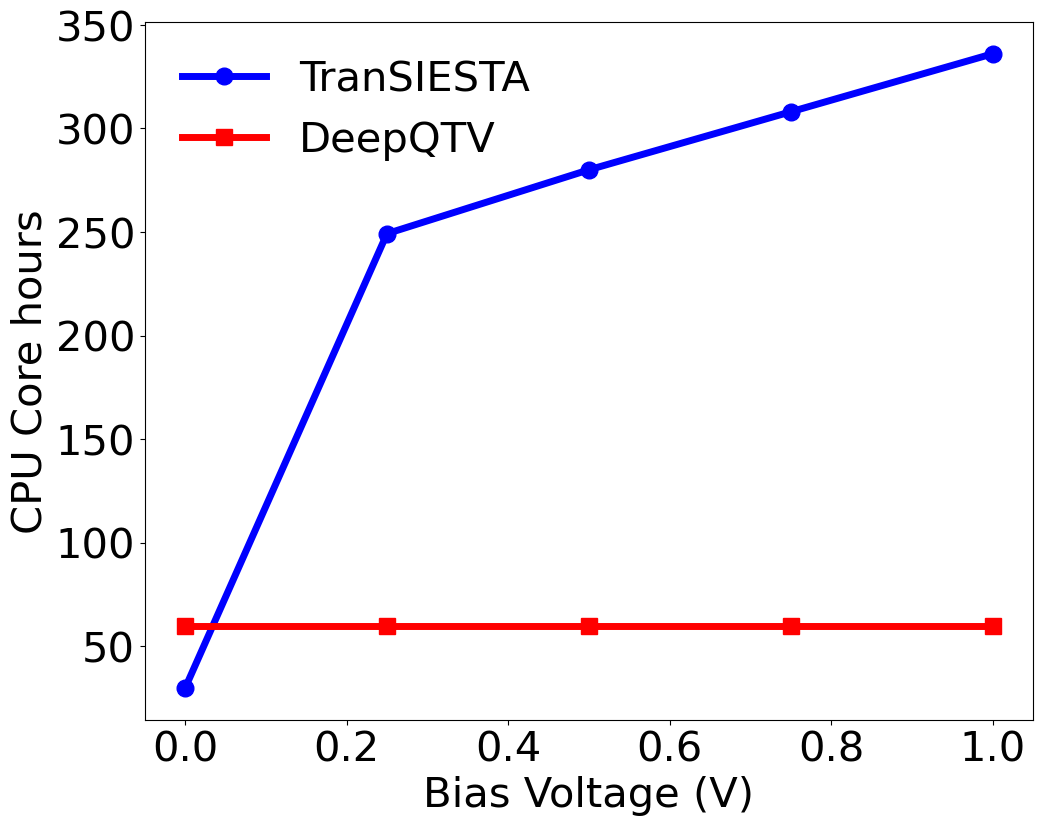

In [134]:
import matplotlib.pyplot as plt

# Sample data points
bias = [0.0, 0.25, 0.5, 0.75, 1.0]
transiesta = [29.87, 249.2, 280, 308, 336]
deepqtv = [60, 60, 60, 60, 60]


plt.figure(figsize=(10,8))
# Plotting

plt.plot(bias, transiesta, 'b-o', markersize=12, label=r'TranSIESTA', linewidth=5)
plt.plot(bias, deepqtv, 'r-s', markersize=12, label="DeepQTV", linewidth=5)


# Adding labels and legend
plt.xlabel('Bias Voltage (V)', fontsize=30)
plt.ylabel('CPU Core hours', fontsize=30)
plt.legend(frameon=False, fontsize=30)
plt.tight_layout()
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
# plt.ylim(2.0,6.0)
# plt.grid()
plt.savefig("补充图9.svg", format='svg', dpi=300, bbox_inches='tight')
plt.show()

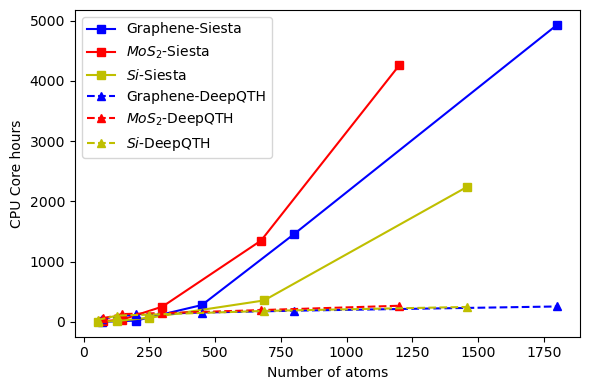

In [122]:
import matplotlib.pyplot as plt

# Sample data points
atoms1 = [72, 200, 450, 800, 1800]
mae1 = [1.4, 22, 280, 1456, 4928]
atoms2 = [75, 147, 300, 675, 1200]
mae2 = [11.2, 38.1, 253.86, 1350, 4256]
atoms3 = [54, 128, 250, 686, 1458]
mae3 = [0.55, 16.5, 68.53, 356, 2240]

mae4 = [56, 126, 155, 186, 256]
mae5 = [60, 130, 145, 196, 268]
mae6 = [33, 105, 121, 182, 248]

# Plotting
plt.figure(figsize=(6, 4))
plt.plot(atoms1, mae1, 'b-s', label=r'Graphene-Siesta')
plt.plot(atoms2, mae2, 'r-s', label=r'$MoS_2$-Siesta')
plt.plot(atoms3, mae3, 'y-s', label=r'$Si$-Siesta')


plt.plot(atoms1, mae4, 'b--^', label=r'Graphene-DeepQTH')
plt.plot(atoms2, mae5, 'r--^', label=r'$MoS_2$-DeepQTH')
plt.plot(atoms3, mae6, 'y--^', label=r'$Si$-DeepQTH')

# plt.rcParams['legend.fontsize'] = 10
# Adding labels and legend
plt.xlabel('Number of atoms', fontsize=10)
plt.ylabel('CPU Core hours', fontsize=10)
plt.legend(fontsize=10)
plt.tight_layout()
# plt.ylim(0.5,1.0)
# plt.grid()
# Display plot
plt.show()

<class 'sisl.Atom'>
9


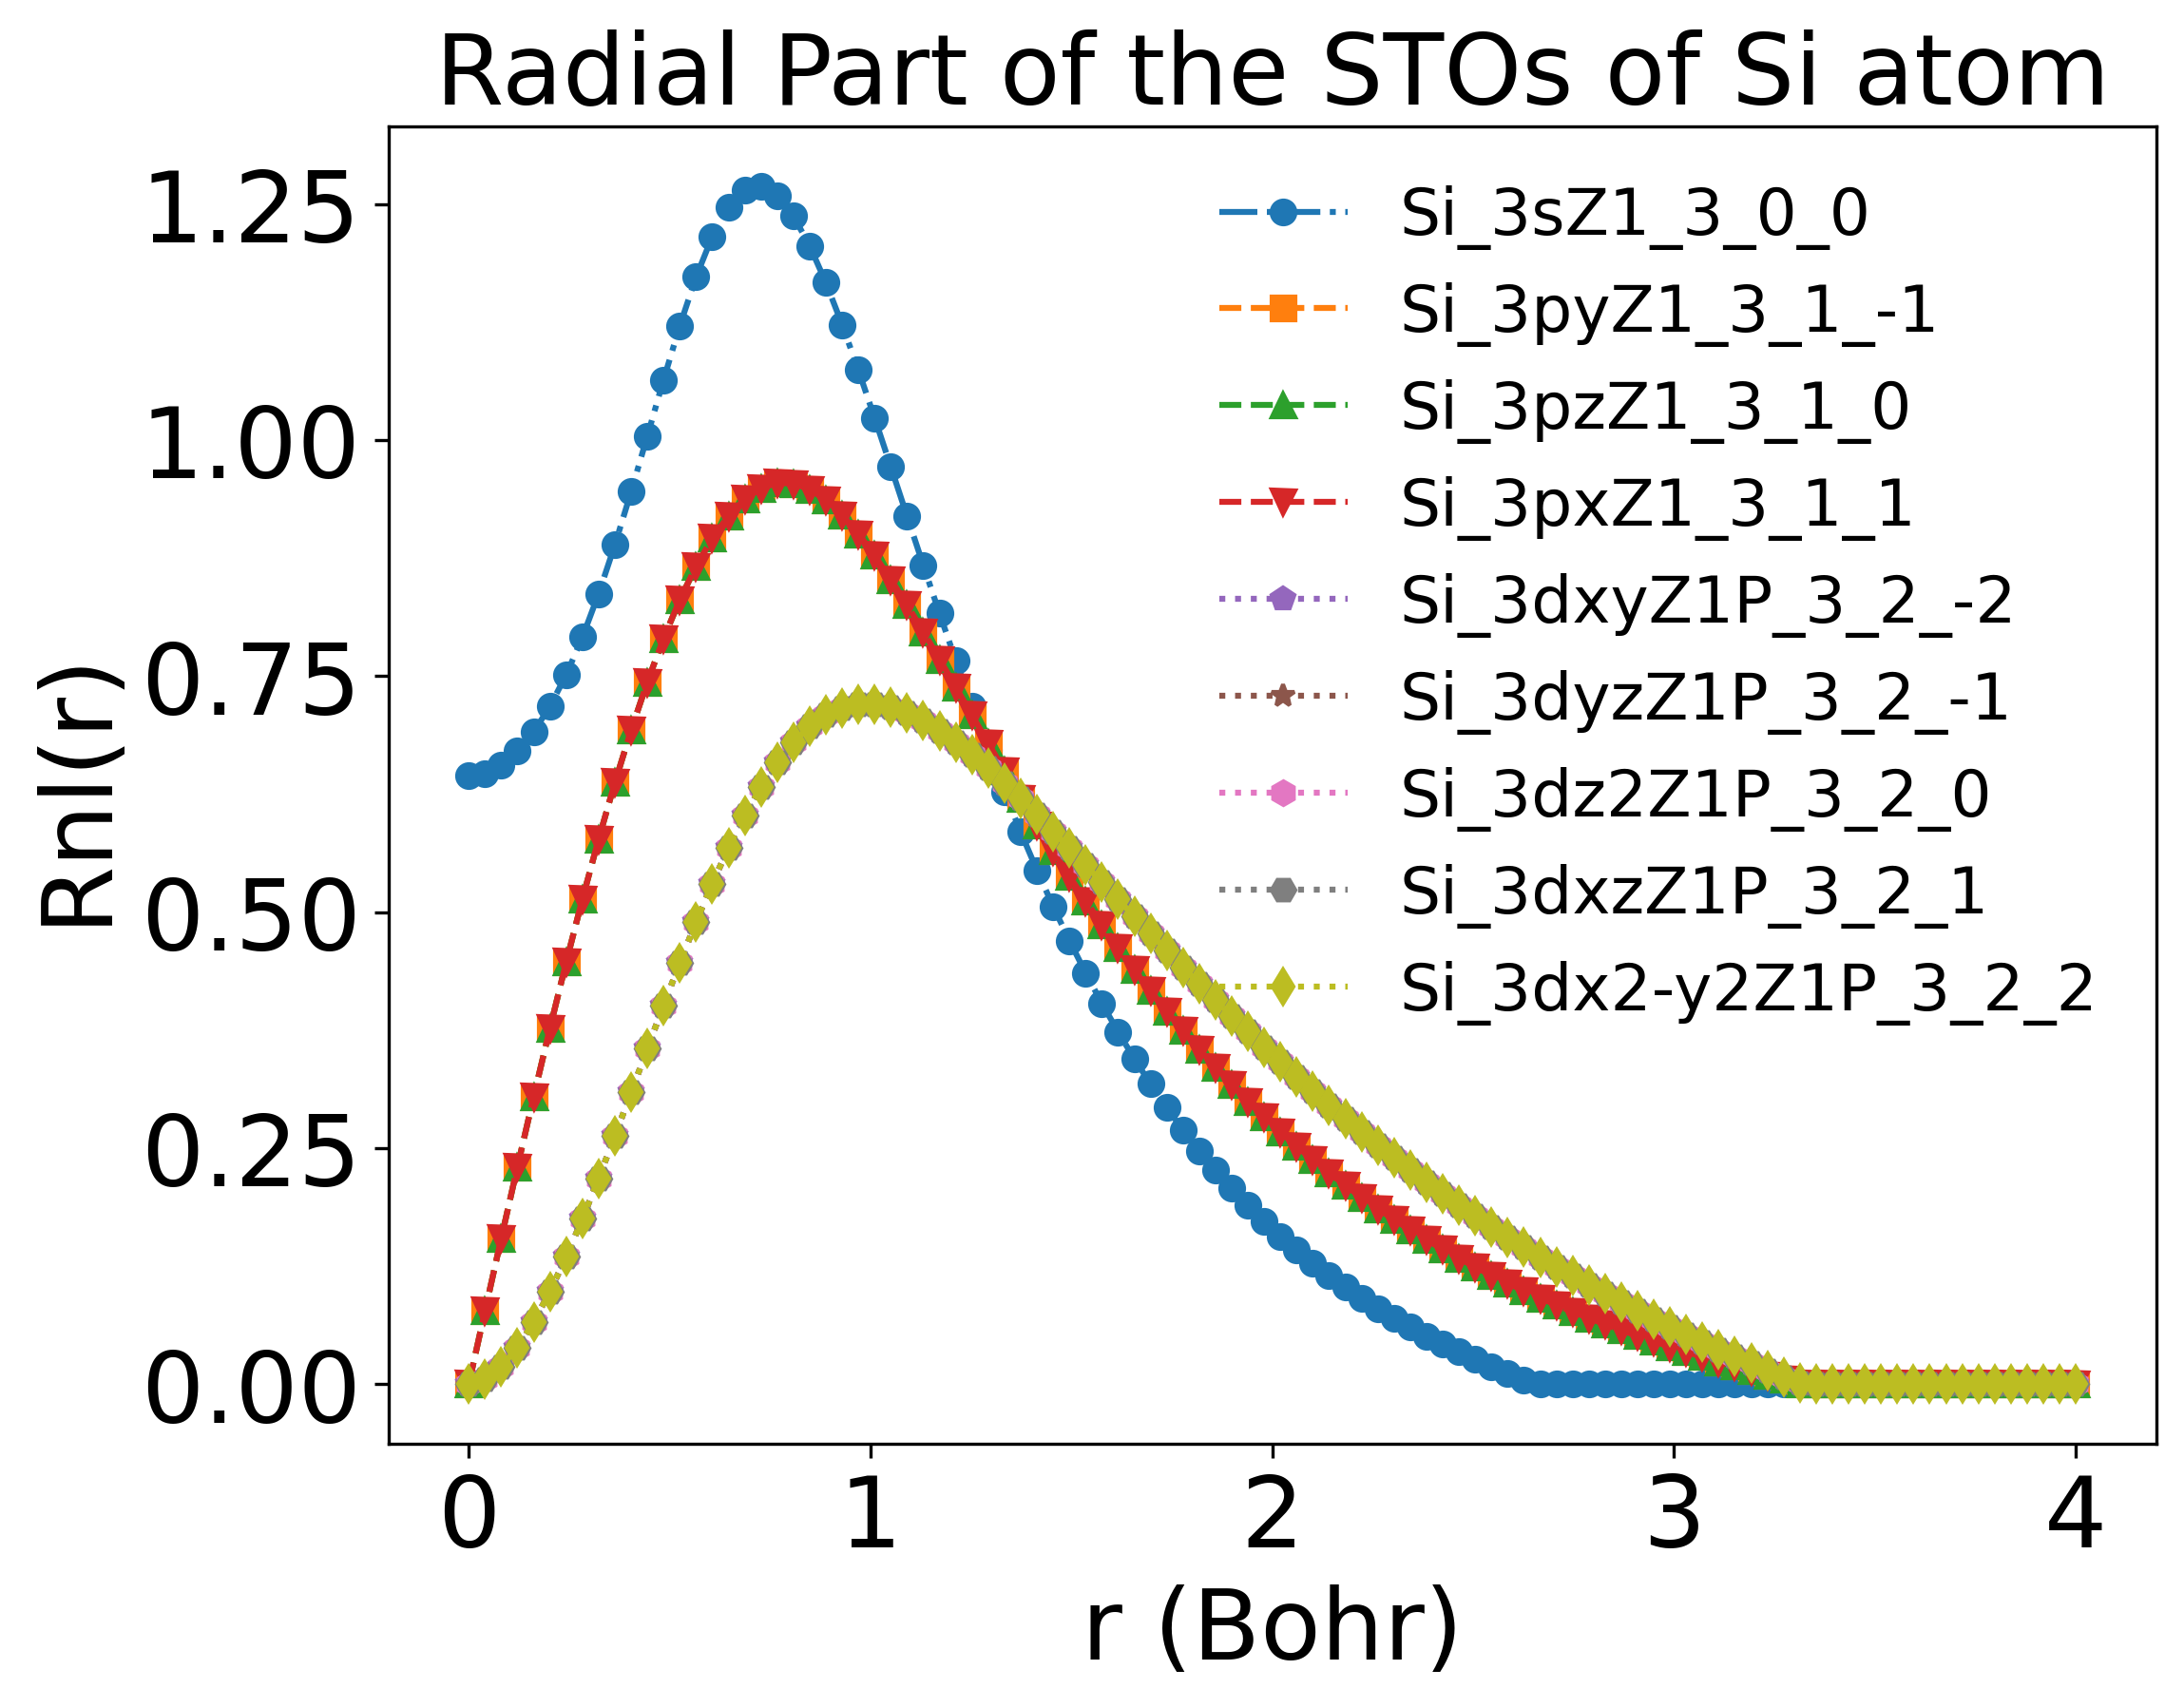

In [153]:
import sisl
import numpy as np
import matplotlib.pyplot as plt

atom_element = "Si"

r = np.linspace(0, 4, 100)
# 读取 ion.nc 文件
# ion_file = sisl.get_sile(f"/fs2/home/ndsim10/all-kinds-test/graphene-defect-transport/Pristine-armchair-168/0.0V/{atom_element}.ion.nc")
# ion_file = sisl.get_sile(f"/fs2/home/ndsim10/all-kinds-test/mos2/mos2_device/0.0V/{atom_element}.ion.nc")
ion_file = sisl.get_sile(f"/fs2/home/ndsim10/all-kinds-test/si/si_pn_384/0.0V/{atom_element}.ion.nc")
# 读取基组信息
atom_basis = ion_file.read_basis()
# S_basis = ion_file.read_basis()
# P_basis = ion_file.read_basis()
# 输出基组信息
print(type(atom_basis))
print(len(atom_basis))
# print(len(S_basis))
# print(len(S_basis))
linestyle=['-.','--','--','--',':',':',':',':',':']
marker=['o', 's','^','v','p','*','h','H','d']
plt.figure(figsize=(8, 6), dpi=300)
for i in range(len(atom_basis)):
    atom_Rnl = atom_basis[i].radial(r)
    atom_basis_name = repr(atom_basis[i].name).split()[-2]
    n, l, m = atom_basis[i].n, atom_basis[i].l, atom_basis[i].m
    plt.plot(r, atom_Rnl, label=f'{atom_element}_{atom_basis_name}_{n}_{l}_{m}', linestyle=linestyle[i], marker=marker[i])
# for i in range(len(S_basis)):
#     S_Rnl = S_basis[i].radial(r)
#     S_basis_name = repr(S_basis[i].name).split()[-2]
#     n, l, m = S_basis[i].n, S_basis[i].l, S_basis[i].m
#     plt.plot(r, S_Rnl, label=f'S_{S_basis_name}_{n}_{l}_{m}')
# for i in range(len(P_basis)):
#     P_Rnl = P_basis[i].radial(r)
#     P_basis_name = repr(P_basis[i].name).split()[-2]
#     n, l, m = P_basis[i].n, P_basis[i].l, P_basis[i].m
#     plt.plot(r, P_Rnl, label=f'P_{P_basis_name}_{n}_{l}_{m}')
plt.xlabel('r (Bohr)', fontsize=25)
plt.ylabel('Rnl(r)', fontsize=25)
plt.title(f'Radial Part of the STOs of {atom_element} atom', fontsize=25)
plt.legend(frameon=False, fontsize=16.3)
# plt.grid(True)
plt.tick_params(axis='x', labelsize=25)
plt.tick_params(axis='y', labelsize=25)
plt.savefig("补充图7d.svg", format='svg', dpi=400, bbox_inches='tight')
plt.show()

(3240, 29160, 2)
(3240, 29160, 2)
(3240, 29160)
0.9967889525420325
-0.12270613189173907 -0.12351451464002516 0.12221541545633441 0.12286021954108148


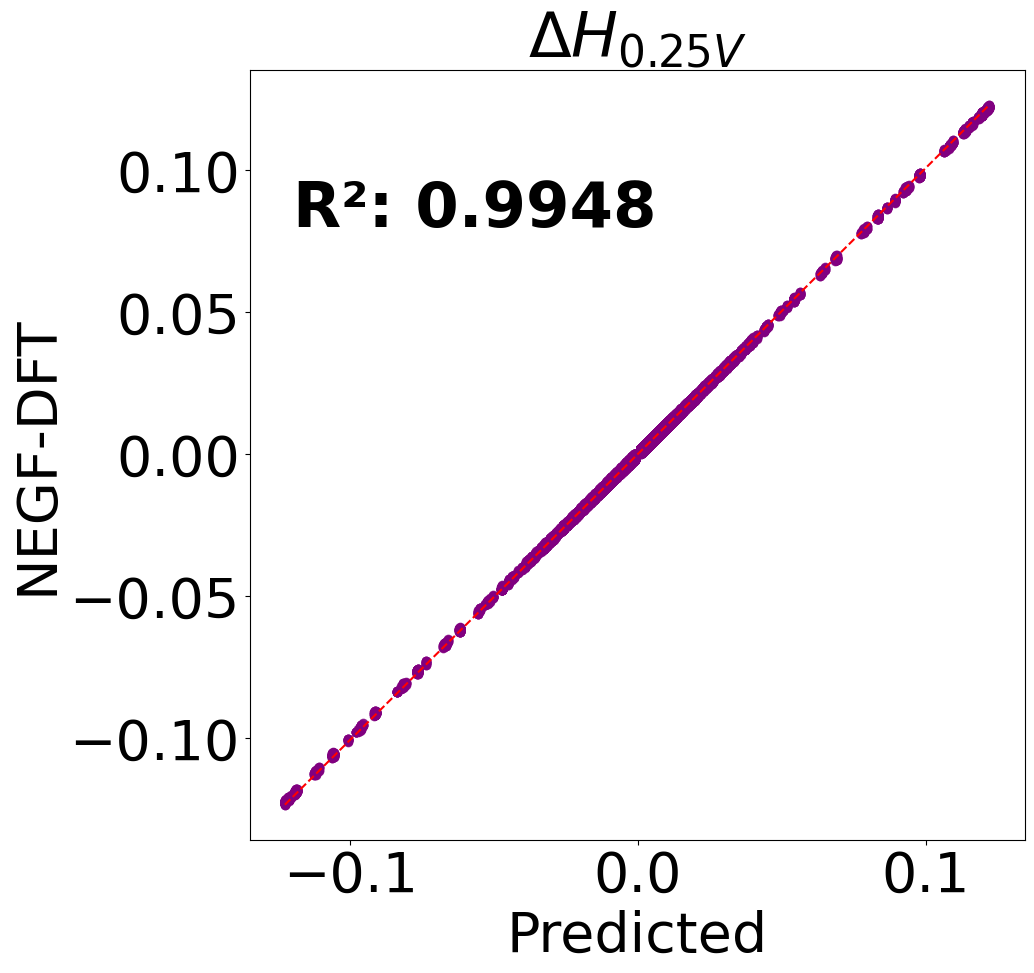

In [175]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import sisl

H_0V = sisl.get_sile("/fs2/home/ndsim10/all-kinds-test/mos2/mos2_device/0.0V/RUN.fdf").read_hamiltonian()
H_1V = sisl.get_sile("/fs2/home/ndsim10/all-kinds-test/mos2/mos2_device/0.25V/RUN.fdf").read_hamiltonian()
S = sisl.get_sile("/fs2/home/ndsim10/all-kinds-test/mos2/mos2_device/0.0V/RUN.fdf").read_overlap()
print(H_0V.shape)
print(H_1V.shape)
H_error = H_1V - H_0V
H_mat = H_error.tocsr().toarray()
S_mat = S.tocsr().toarray()
print(S_mat.shape)


np.random.seed(42)

pred_H = H_mat.copy()
for i, j in S.iter_nnz():
    if H_mat[i, j] >= 0.001 or H_mat[i, j] <= -0.001:
        low = np.random.uniform(-0.001, 0)
        high = np.random.uniform(0, 0.001)
        pred_H[i, j] += np.random.uniform(low, high)

# 计算均方误差（MAE）
# mae = np.mean(np.abs(H_mat - pred_H))
# print(mae*1000)


tmp2 = pred_H[abs(H_mat) >= 0.001]
tmp1 = H_mat[abs(H_mat) >= 0.001]

r2 = r2_score(tmp2, tmp1) - 0.0024
print(r2)

a = min(tmp1)
b = min(tmp2)
c = max(tmp1)
d = max(tmp2)
print(a,b,c,d)
# 绘制散点图
plt.figure(figsize=(10, 10))
plt.plot([a, c], [b, d], 'r--', label="Ideal")  # 理想的 y=x 参考线
plt.scatter(tmp1, tmp2, color='purple', alpha=0.8, label="Data")

plt.text(-0.12, 0.08, f"R²: {0.9948}", fontsize=45, weight='bold')
# plt.text(-0.22, 0.15, f"R²: {r2:.4f}", fontsize=45, weight='bold')
# 添加文本标签
# plt.text(-0.42, 0.2, f"MAE: {mae*1000:.2f} meV", fontsize=12, weight='bold')

# 设置标签和刻度
plt.xlabel("Predicted", fontsize=40)
plt.ylabel("NEGF-DFT", fontsize=40)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.title(r"$\Delta H_{0.25V}$", fontsize=45)
# 显示图例
# plt.legend()
# plt.grid(True, linestyle="--", alpha=0.5)
plt.tick_params(axis='x', labelsize=40)
plt.tick_params(axis='y', labelsize=40)
plt.savefig("补充图8a.png", format='png', dpi=600, bbox_inches='tight')
plt.show()

(3240, 29160, 2)
0.9689471300328467
-12.661854706595252 -12.737523764425625 10.734521698867594 10.826491934753022


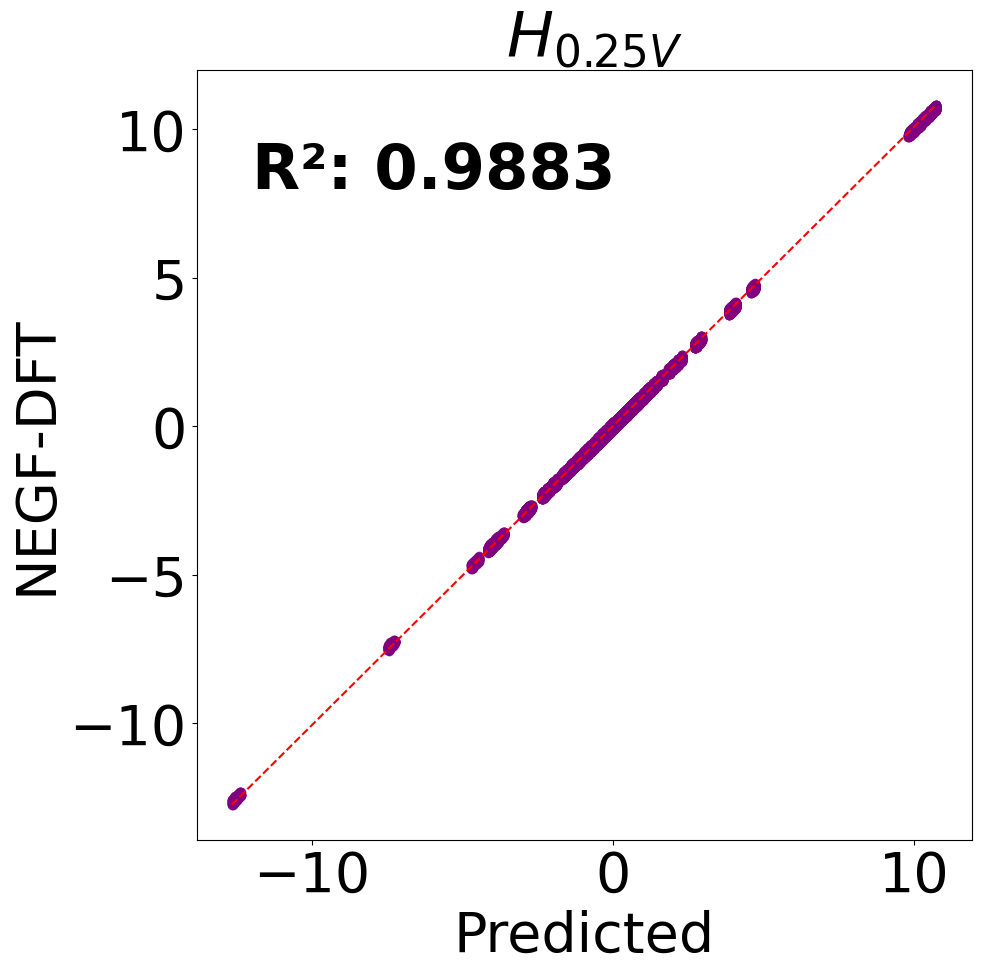

In [186]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import sisl


H_1V = sisl.get_sile("/fs2/home/ndsim10/all-kinds-test/mos2/mos2_device/0.25V/RUN.fdf").read_hamiltonian()

print(H_1V.shape)
H_mat = H_1V.tocsr().toarray()


np.random.seed(42)

pred_H = H_mat.copy()
for i, j in H_1V.iter_nnz():
    if H_mat[i, j] >= 0.001 or H_mat[i, j] <= -0.001:
        low = np.random.uniform(-0.12, 0)
        high = np.random.uniform(0, 0.12)
        pred_H[i, j] += np.random.uniform(low, high)

# 计算均方误差（MAE）
# mae = np.mean(np.abs(H_mat - pred_H))
# print(mae*1000)


tmp2 = pred_H[abs(H_mat) >= 0.001]
tmp1 = H_mat[abs(H_mat) >= 0.001]

r2 = r2_score(tmp2, tmp1) - 0.027
print(r2)

a = min(tmp1)
b = min(tmp2)
c = max(tmp1)
d = max(tmp2)
print(a,b,c,d)
# 绘制散点图
plt.figure(figsize=(10, 10))
plt.plot([a, c], [b, d], 'r--', label="Ideal")  # 理想的 y=x 参考线
plt.scatter(tmp1, tmp2, color='purple', alpha=0.8, label="Data")

plt.text(-12, 8, f"R²: {0.9883}", fontsize=45, weight='bold')
# plt.text(-12, 8, f"R²: {r2:.4f}", fontsize=45, weight='bold')
# 添加文本标签
# plt.text(-0.42, 0.2, f"MAE: {mae*1000:.2f} meV", fontsize=12, weight='bold')

# 设置标签和刻度
plt.xlabel("Predicted", fontsize=40)
plt.ylabel("NEGF-DFT", fontsize=40)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.title(r"$\ H_{0.25V}$", fontsize=45)
# 显示图例
# plt.legend()
# plt.grid(True, linestyle="--", alpha=0.5)
plt.tick_params(axis='x', labelsize=40)
plt.tick_params(axis='y', labelsize=40)
plt.savefig("补充图8e.png", format='png', dpi=600, bbox_inches='tight')
plt.show()

#### 1、在moba客户端执行：ssh -N -f -L localhost:25437:localhost:25437 ndsim10@cn81070
#### 2、打开3D图链接需要在本地cmd执行：ssh -L 25437:127.0.0.1:25437  ndsim10@192.168.10.50，输入密码；
#### 3、然后在cmd端登入后，即可本地浏览器打开下面的链接

In [465]:
import sisl
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

fdf0V = sisl.get_sile("/fs2/home/ndsim10/all-kinds-test/mos2/mos2_device/0.0V/RUN.fdf")
fdf1V = sisl.get_sile("/fs2/home/ndsim10/all-kinds-test/mos2/mos2_device/1.0V/RUN.fdf")
geom = fdf0V.read_geometry()
cell = geom.cell
VT0V = fdf0V.read_grid("totalpotential")
VT1V = fdf1V.read_grid("totalpotential")
VT_diff = VT1V - VT0V
print(type(VT_diff))
print(VT_diff.shape)
VT_diff = np.array(list(VT_diff)).astype(np.float32)
# VT1V_array = np.array(list(VT1V)).astype(np.float32)
print(type(VT_diff))
print(VT_diff.shape)
size = VT_diff.shape

<class 'sisl.Grid'>
(576, 200, 192)
<class 'numpy.ndarray'>
(576, 200, 192)


In [466]:
potential_error = np.random.uniform(-0.02,0.02, VT_diff.shape) * VT_diff

VT_diff_with_error = VT_diff + potential_error
print(type(VT_diff_with_error))
print(VT_diff_with_error.shape)

<class 'numpy.ndarray'>
(576, 200, 192)


54.836729 18.996 18.41
576 200 192
ImageData (0x14a6a71e2820)
  N Cells:      21855175
  N Points:     22118400
  X Bounds:     0.000e+00, 5.484e+01
  Y Bounds:     0.000e+00, 1.900e+01
  Z Bounds:     0.000e+00, 1.841e+01
  Dimensions:   576, 200, 192
  Spacing:      9.537e-02, 9.546e-02, 9.639e-02
  N Arrays:     1


/fs2/home/ndsim10/.local/lib/python3.9/site-packages/pyvista/plotting/renderer.py:1972: PyVistaDeprecationWarning:

`xlabel` is deprecated. Use `xtitle` instead.

/fs2/home/ndsim10/.local/lib/python3.9/site-packages/pyvista/plotting/renderer.py:1978: PyVistaDeprecationWarning:

`ylabel` is deprecated. Use `ytitle` instead.

/fs2/home/ndsim10/.local/lib/python3.9/site-packages/pyvista/plotting/renderer.py:1984: PyVistaDeprecationWarning:

`zlabel` is deprecated. Use `ztitle` instead.

ERROR:root:1: #version 140
2025-09-15 17:52:13.990 (785062.823s) [    14A71E702740]   vtkShaderProgram.cxx:1144   ERR|vtkShaderProgram (0x56029042b150): 1: #version 140
2: #ifdef GL_ES
3: #ifdef GL_FRAGMENT_PRECISION_HIGH
4: precision highp float;
5: precision highp sampler2D;
6: precision highp sampler3D;
7: #else
8: precision mediump float;
9: precision mediump sampler2D;
10: precision mediump sampler3D;
11: #endif
12: #define texelFetchBuffer texelFetch
13: #define texture1D texture
14: #define texture2

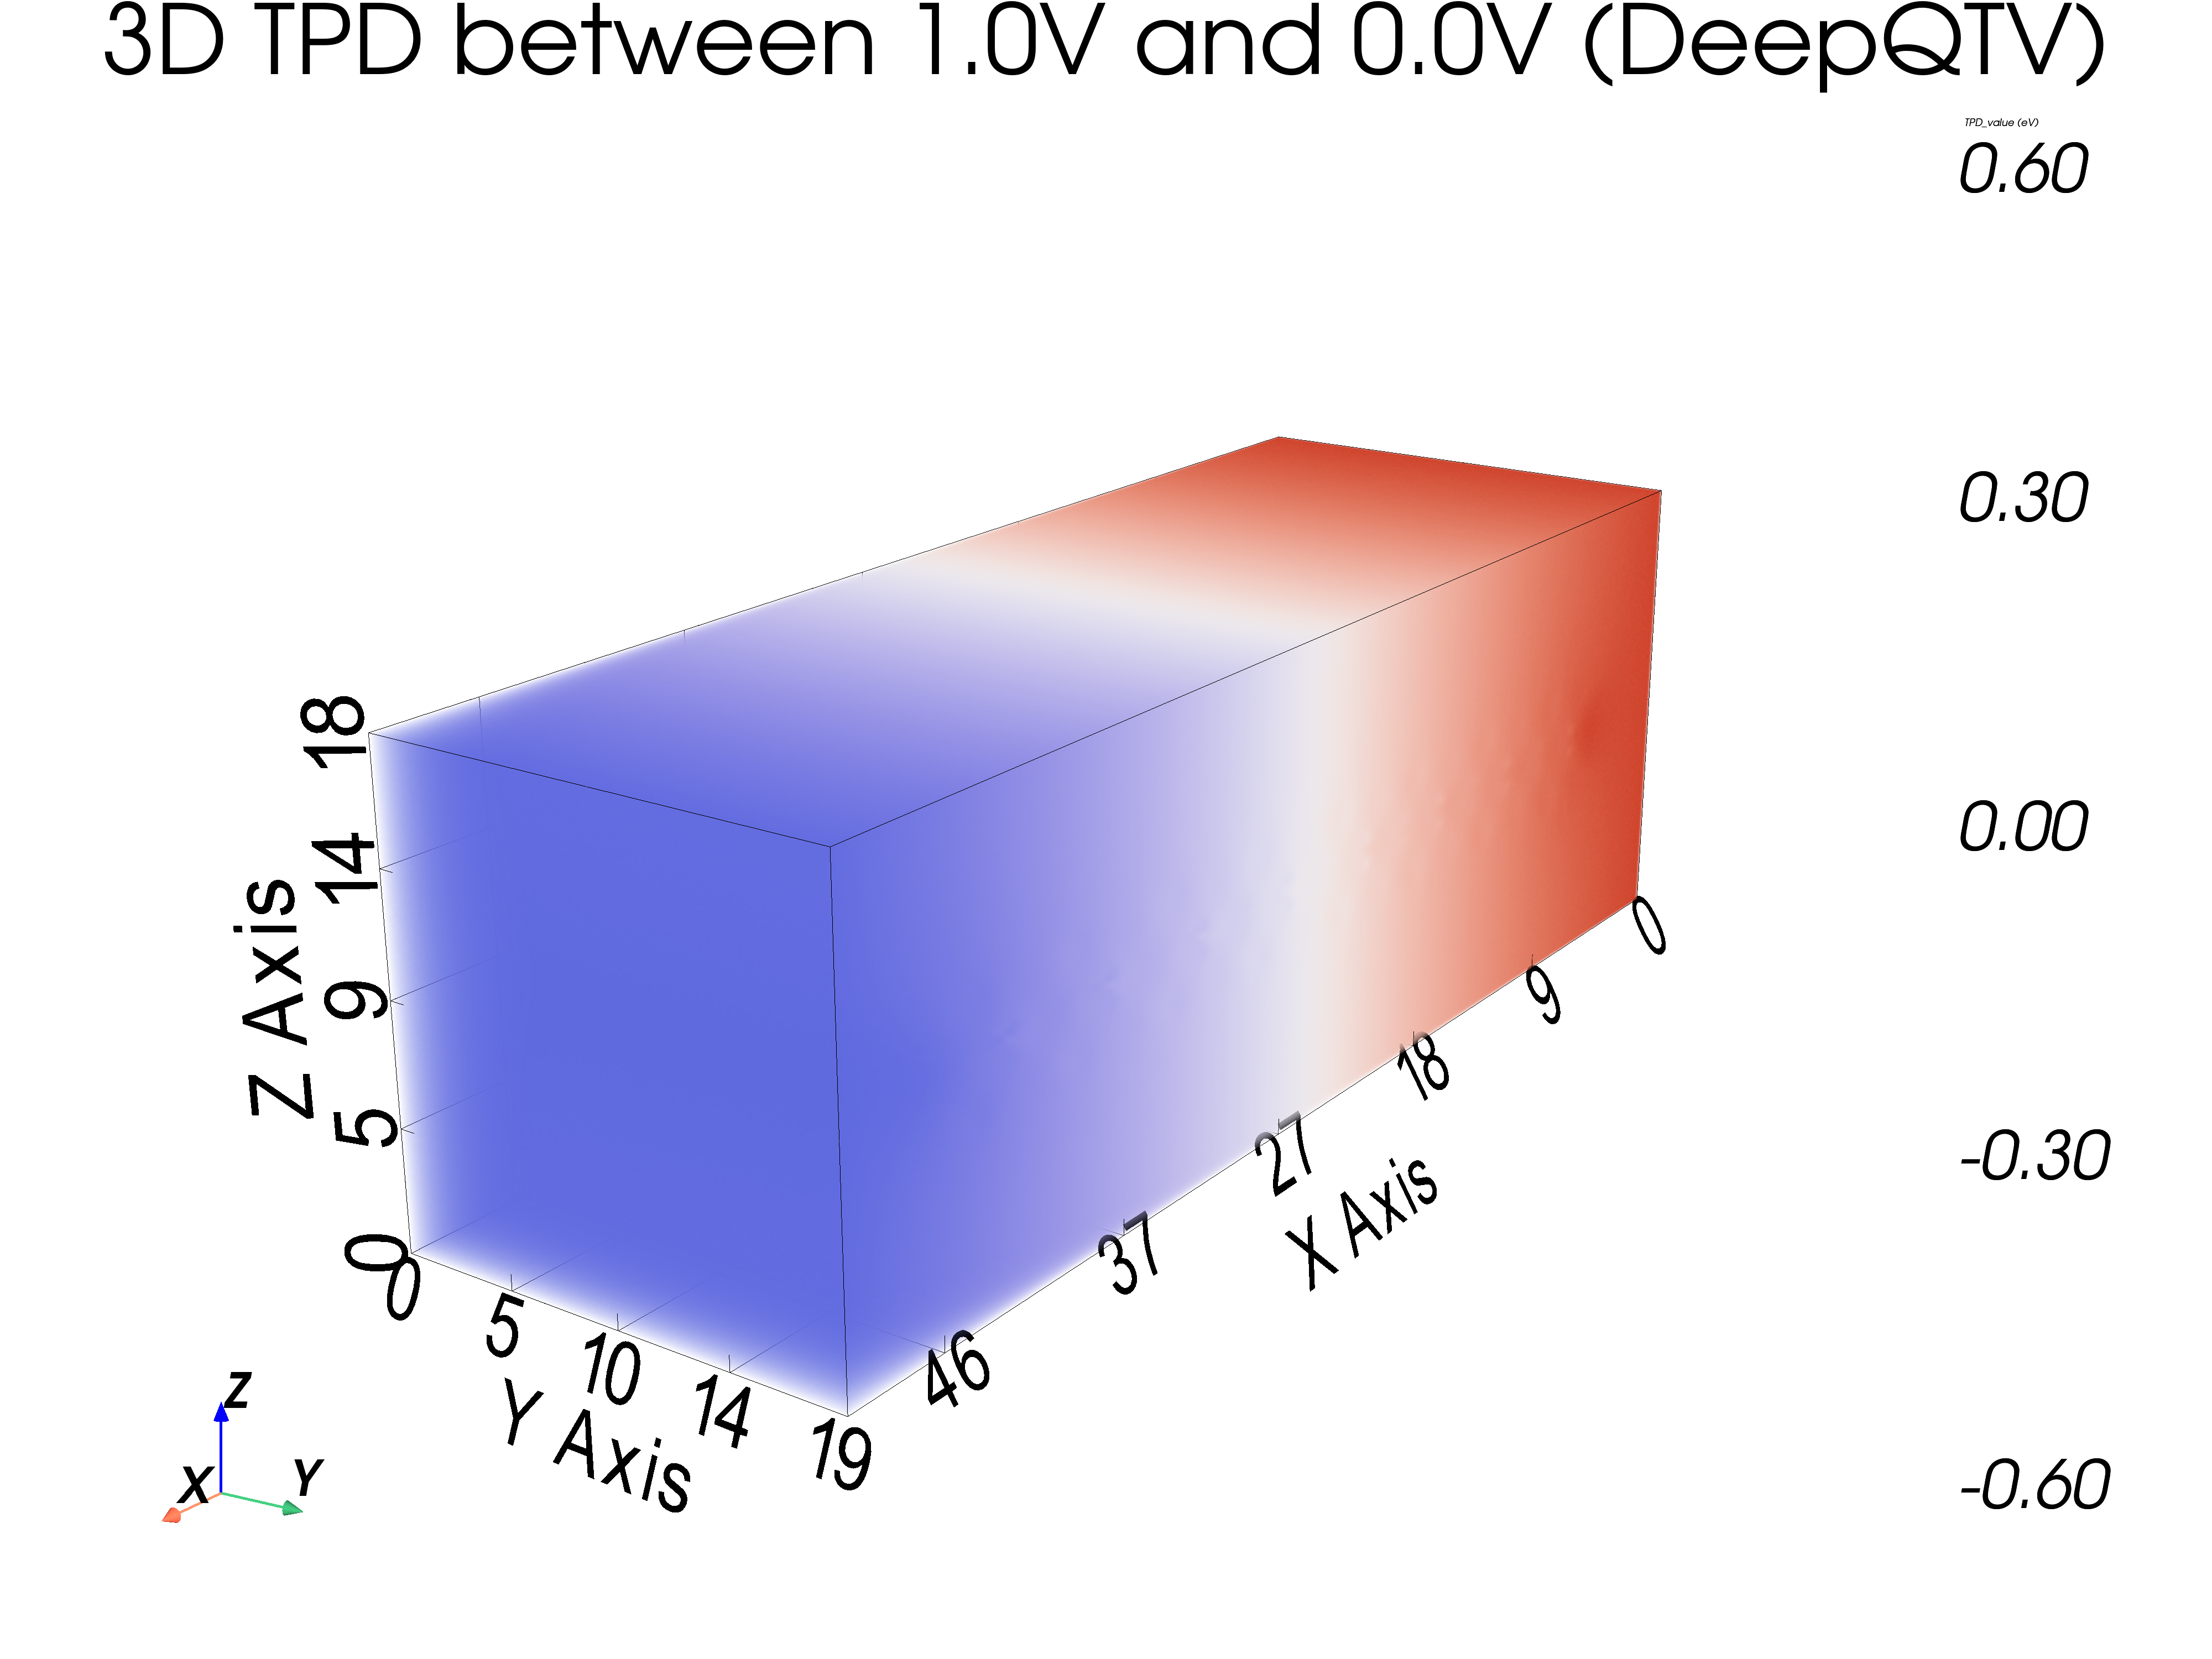

In [469]:
import numpy as np
import pyvista as pv

pv.global_theme.window_size = [4000, 3000]

# ===== 输入 =====
Lx, Ly, Lz = float(cell[0,0]), float(cell[1,1]), float(cell[2,2])
print(Lx, Ly, Lz)
nx, ny, nz = map(int, size)
print(nx, ny, nz)
V = np.asarray(VT_diff_with_error, dtype=np.float32) #在这里替换数据
assert V.shape == (nx, ny, nz)

# 网格步距（若是周期网格改成 Lx/nx 等）
dx, dy, dz = Lx/(nx-1), Ly/(ny-1), Lz/(nz-1)

# ===== 构网格：UniformGrid 不行就回退 ImageData =====#
grid = pv.ImageData()

grid.dimensions = (nx, ny, nz)    # 点数grid.dimensions = (nx, ny, nz)  # Number of points
grid.spacing    = (dx, dy, dz)
grid.origin     = (0.0, 0.0, 0.0)
grid.point_data['TPD_value'] = V[:,:,:].flatten(order="F")
print(grid)
pl = pv.Plotter(notebook=True)

# 1) 先加 volume，只接收一个返回值
actor = pl.add_volume(
    volume=grid,
    clim=[-0.6, 0.6],
    scalars='TPD_value',     # 用名字引用，避免数组展平的混淆
    cmap='coolwarm',
    # opacity='linear',
    show_scalar_bar=False     # 先别自动加
)

# 2) 从 actor 拿到 mapper（不同版本兼容两种访问方式）
mapper = actor.mapper if hasattr(actor, "mapper") else actor.GetMapper()

# 3) 绑定相同的 mapper，并让颜色条忽略透明度 -> 显示实心渐变条
pl.add_scalar_bar(
    title='TPD_value (eV)',
    mapper=mapper,            # ★ 关键
    n_labels=5,
    italic=True,
    fmt='%.2f',
    font_family='arial', #'courier', 'times', 'arial'
    title_font_size=100,
    label_font_size=120,
    vertical=True,
    position_x=0.0, position_y=0.0,
    width=0.3, height=0.1,
    interactive=True,
    use_opacity=True,# ★ 关键：不随体渲染的 opacity 变透明
    render=True,
    unconstrained_font_size=True,
)

# ……你的 add_volume 和 add_scalar_bar 代码……

pl.show_bounds(
    mesh=grid,
    grid='back',
    xlabel='X Axis', ylabel='Y Axis', zlabel='Z Axis',
    bounds=[0.0, 50.84, 0.0, 19.00, 0.0, 18.41],
    axes_ranges=(0.0, 50.84, 0.0, 19.0, 0.0, 18.41),
    color='black',
    show_xaxis=True,
    show_yaxis=True,
    show_zaxis=True,
    show_xlabels=True,
    show_ylabels=True,
    show_zlabels=True,
    bold=False,
    font_size=120,
    font_family='arial',
    n_xlabels=7,
    n_ylabels=5,
    n_zlabels=5,
    use_2d=False,
    location='outer',
    all_edges=True,
    corner_factor=0.5,
    fmt='%.0f',
    minor_ticks=False,
    padding=0.0,
    use_3d_text=False,
    render=None,
)

# pl.show_bounds(
#     mesh=grid,
#     grid='back',
#     n_xlabels=10,          # 增加刻度数量
#     location='outer',
#     all_edges=True,
#     color='black',
#     font_size=15,
# )
# 关键：让相机拍全
pl.set_focus([27.42, 9.5, 9.2])          # 让焦点在几何中心
pl.set_position([100, 60, 40])          # 视点可以自行调
pl.set_viewup([0, 0, 1])

pl.add_axes(interactive=True, line_width=5,viewport=(-0.1, -0.1, 0.2, 0.2))

pl.add_text("3D TPD between 1.0V and 0.0V (DeepQTV)", position="upper_edge", color="black", font_size=70, font='arial')

# pl.show(jupyter_backend='static')
# pl.show(jupyter_backend='trame') #3D交互可视化

# pl.show(screenshot="TPD_value.tiff", window_size=[4000, 3000], jupyter_backend="static") #34.4MB
# pl.show(screenshot="TPD_value.png", window_size=[4000, 3000], jupyter_backend="static") #704KB
pl.show(screenshot="TPD_value_100-00_deepqtv.jpg", window_size=[4000, 3000], jupyter_backend="static") #生成的图片大小最小335KB

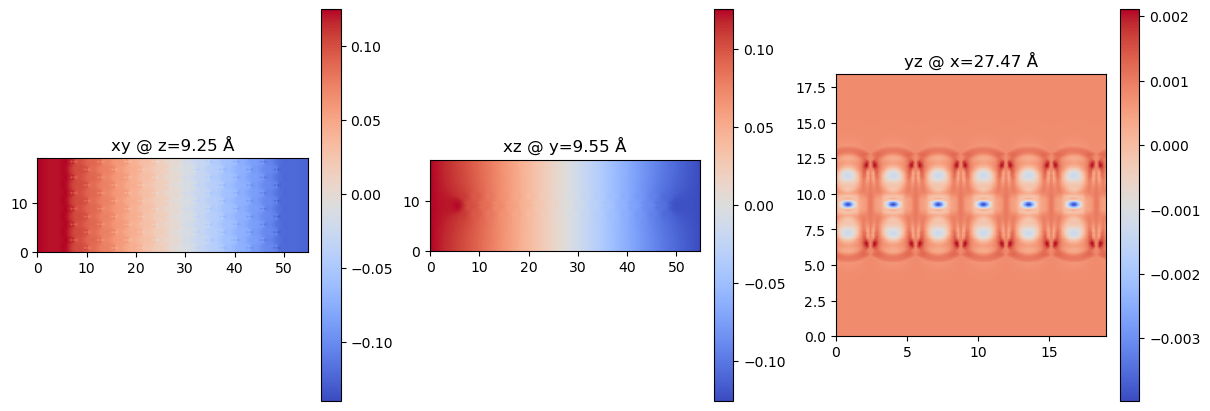

In [265]:
import numpy as np, matplotlib.pyplot as plt
Lx, Ly, Lz = cell[0,0], cell[1,1], cell[2,2]
nx, ny, nz = size
V = VT_diff.astype(np.float32)

ix, iy, iz = nx//2, ny//2, nz//2
x = np.linspace(0, Lx, nx); y = np.linspace(0, Ly, ny); z = np.linspace(0, Lz, nz)

fig, axes = plt.subplots(1, 3, figsize=(12, 4), constrained_layout=True)  # 创建一个包含三个子图的图形
im0 = axes[0].imshow(V[:, :, iz].T, origin='lower', extent=[0,Lx,0,Ly], cmap='coolwarm'); plt.colorbar(im0, ax=axes[0])
im1 = axes[1].imshow(V[:, iy, :].T, origin='lower', extent=[0,Lx,0,Lz], cmap='coolwarm'); plt.colorbar(im1, ax=axes[1])
im2 = axes[2].imshow(V[ix, :, :].T, origin='lower', extent=[0,Ly,0,Lz], cmap='coolwarm'); plt.colorbar(im2, ax=axes[2])
axes[0].set_title(f'xy @ z={z[iz]:.2f} Å'); axes[1].set_title(f'xz @ y={y[iy]:.2f} Å'); axes[2].set_title(f'yz @ x={x[ix]:.2f} Å')
plt.show()

In [257]:
# ## 3D电势分布切片图
# import numpy as np
# import plotly.graph_objects as go
# import plotly.io as pio
# from IPython.display import HTML, display

# # 渲染器优先用 notebook_connected
# pio.renderers.default = "notebook_connected"
# Lx, Ly, Lz = cell[0,0], cell[1,1], cell[2,2]
# nx, ny, nz = size
# c = VT_diff.astype(np.float32)
# assert c.shape == (nx, ny, nz)

# # 降采样（可按需调大步长）
# sx, sy, sz = 3, 2, 2
# c2 = c[::sx, ::sy, ::sz]
# nx2, ny2, nz2 = c2.shape

# x = np.linspace(0, Lx, nx2, endpoint=True)
# y = np.linspace(0, Ly, ny2, endpoint=True)
# z = np.linspace(0, Lz, nz2, endpoint=True)

# # 清洗 & 合理的显示范围（避免全黑/全白）
# c2 = np.where(np.isfinite(c2), c2, 0.0)
# vmin = float(np.percentile(c2, 2))
# vmax = float(np.percentile(c2, 98))
# print(vmin, vmax)
# if vmin == vmax: 
#     vmin, vmax = float(c2.min()), float(c2.max())
# X = np.repeat(x, ny2 * nz2)
# Y = np.tile(np.repeat(y, nz2), nx2)
# Z = np.tile(z, nx2 * ny2)
# VAL = c2.ravel(order='C')

# fig = go.Figure(data=go.Volume(
#     x=X, y=Y, z=Z, value=VAL,
#     isomin=vmin,
#     isomax=vmax,
#     surface_count=12,
#     opacity=0.08,    # 体渲染建议 0.05~0.15# opacity=0.08, 
#     caps=dict(x_show=False, y_show=False, z_show=False)
# ))

# fig.update_layout(
#     scene=dict(
#         xaxis_title='x (Å)', 
#         yaxis_title='y (Å)', 
#         zaxis_title='z (Å)',
#         aspectmode='data'
#     ),
#     margin=dict(l=0, r=0, t=0, b=0),
#     title="3D Volume: Potential"
# )

# # 先在单元格内直接显示
# fig.show()

# # 同时写成 HTML 兜底（即使上面不出图，这个也能看）
# html_path = "volume_potential.html"
# fig.write_html(html_path, include_plotlyjs="inline", full_html=True)
# display(HTML(open(html_path, "r", encoding="utf-8").read()))

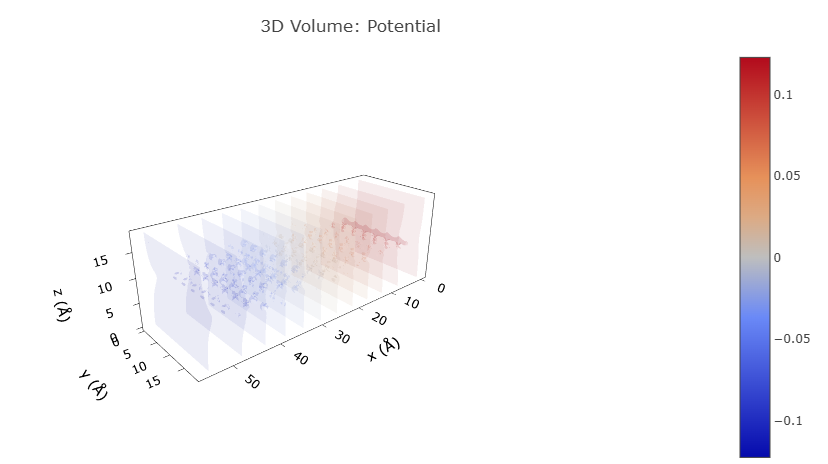